In [1]:
!pip install missingno

In [2]:
!pip install catboost

In [3]:
import pandas as pd
import numpy as np
import missingno as msno
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('D:/DS/Titanic/titanic/train.csv')
test = pd.read_csv('D:/DS/Titanic/titanic/test.csv')
ss = pd.read_csv('D:/DS/Titanic/titanic/gender_submission.csv')

In [5]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
ss

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [8]:
print(train.shape,' ',test.shape)
print('Target Variable: Survived')

(891, 12)   (418, 11)
Target Variable: Survived


# Data Description

- Survived: 0-Did not survive, 1- Survived
- pclass: 1-1st, 2-2nd, 3-3rd
- sex: male or female
- age: age in years
- sibsp: number of siblings/spouses aboard
- parch: number of parents/children aboard
- ticket: ticker number (alphanumeric)
- fare: fare paid
- cabin: cabin number
- embarked: port of embarkation, C-Cherbourg, Q-Queenstown, S-Southhampton

In [9]:
train.info()
print('\n'*5)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pc

In [10]:
train.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
test.isnull().sum().sort_values(ascending = False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<AxesSubplot:>

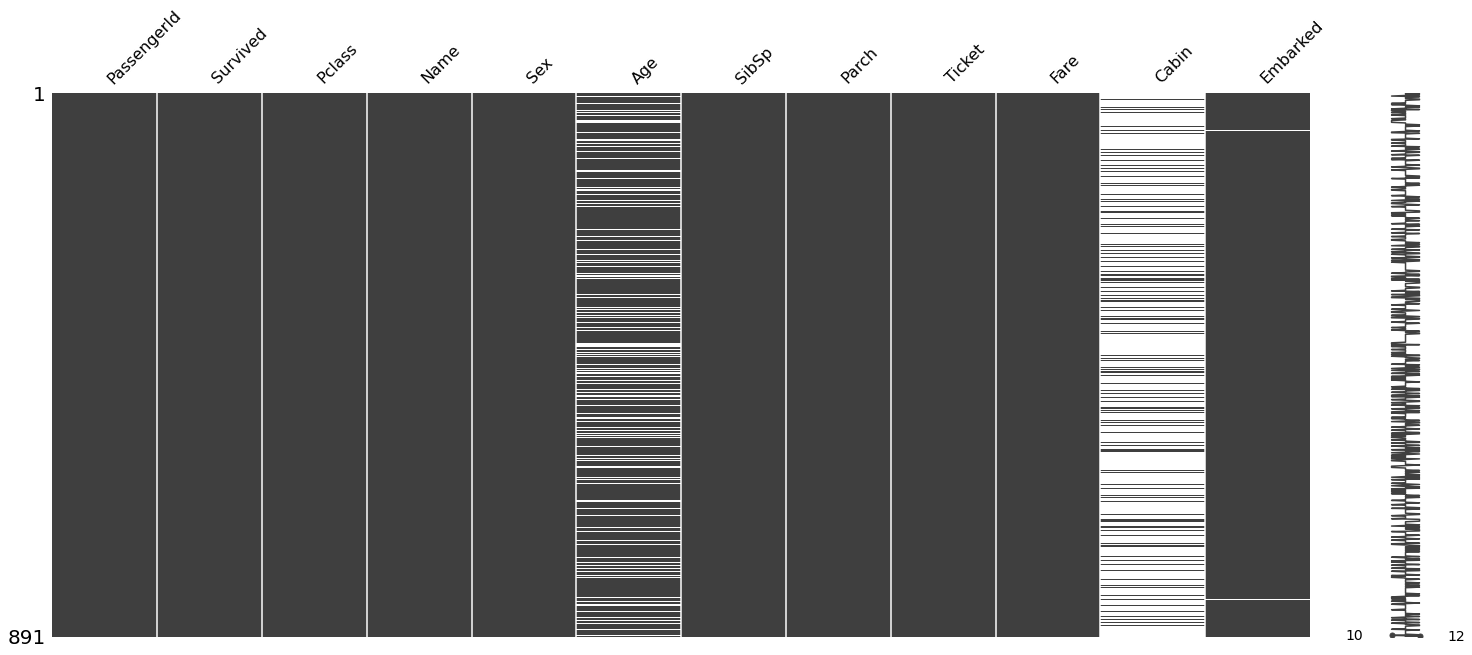

In [12]:
msno.matrix(train)

<AxesSubplot:>

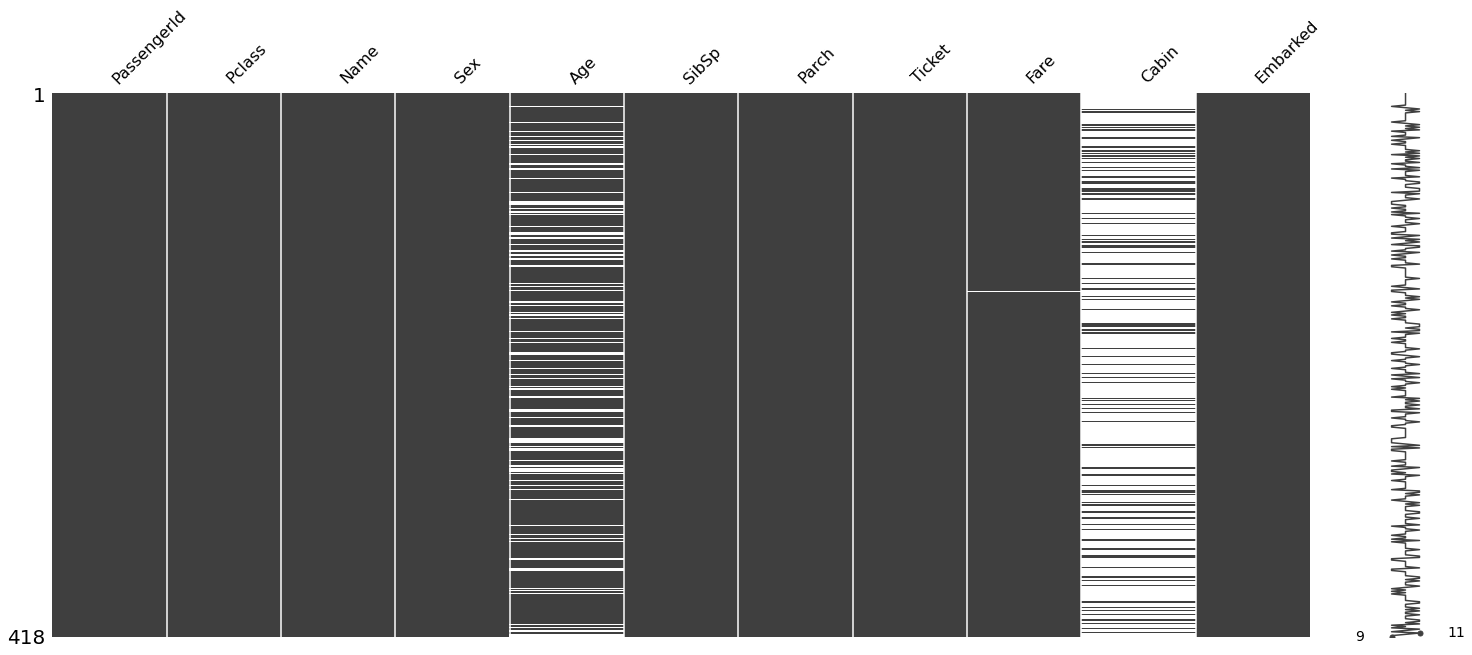

In [13]:
msno.matrix(test)

In [14]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Categorical Variables
- Sex
- pclass
- embarked

In [16]:
#Sex
###########

train['Sex'].value_counts(dropna = False)

male      577
female    314
Name: Sex, dtype: int64

In [17]:
train[['Sex','Survived']].groupby('Sex', as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Gender')

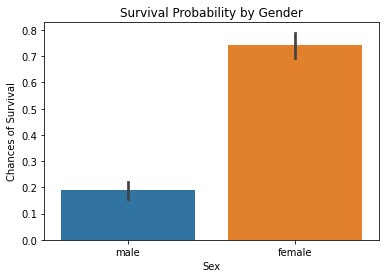

In [18]:
sns.barplot(x = 'Sex', y = 'Survived', data = train)
plt.ylabel('Chances of Survival')
plt.title('Survival Probability by Gender')
#Females were more likely to survive due to early evacuation

In [19]:
#Pclass
###########

train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [20]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

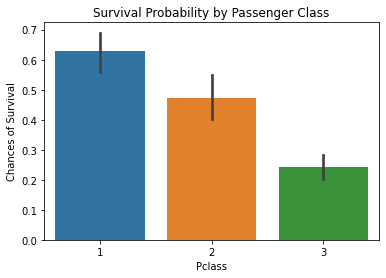

In [21]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train)
plt.ylabel('Chances of Survival')
plt.title('Survival Probability by Passenger Class')

#1st class passengers were more likely to survive followed by 2nd and 3rd class. 1st class was prioritised during evacuation

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

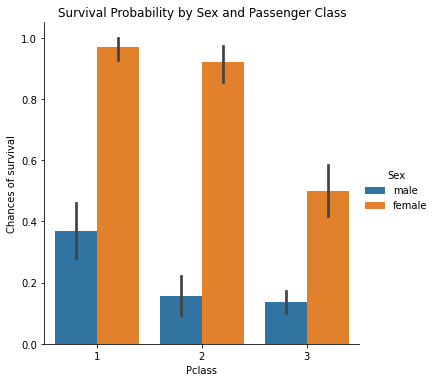

In [22]:
#Gender Survival by Class
sns.factorplot(x ='Pclass', y = 'Survived', hue = 'Sex', data = train, kind = 'bar')
plt.ylabel('Chances of survival')
plt.title('Survival Probability by Sex and Passenger Class')

In [23]:
#Embarked
############

train['Embarked'].value_counts(dropna = False)
#2 Missing values

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [24]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


Text(0.5, 1.0, 'Surivival Probaility by Point of Embarkation')

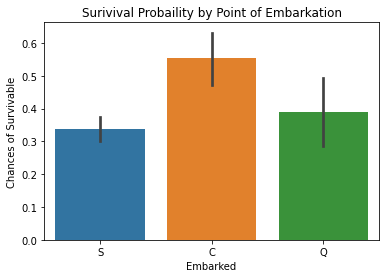

In [25]:
sns.barplot(x ='Embarked', y ='Survived', data = train)
plt.ylabel('Chances of Survivable')
plt.title('Surivival Probaility by Point of Embarkation')

Hypothesis : Most passengers from embarked from Point C were 1st class. <br>
Reasoning : 1st class passengers out of all the three classes were having the most chances of survival. Since C has chance of Survival max out of all three points thence most of the passengers from C were 1st Class

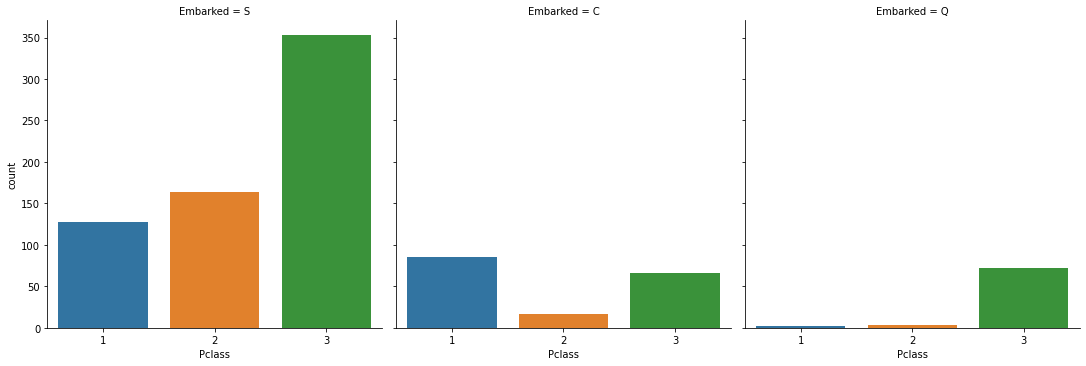

In [26]:
sns.factorplot('Pclass', col = 'Embarked', data = train, kind = 'count')

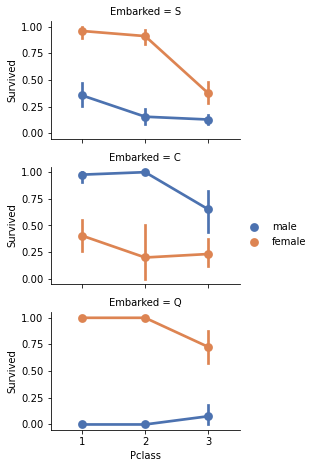

In [27]:
grid = sns.FacetGrid(train, row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex', palette = 'deep')
grid.add_legend()

In [28]:
#Outliers in Numerical Vars

def detect_outliers(df, n, features):
    
    outlier_indices = [] 
    for col in features: 
        Q1 = np.percentile(df[col], 25)
        Q3 = np.percentile(df[col], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR 
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col) 
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n) 
    return multiple_outliers

outliers_to_drop = detect_outliers(train, 2, ['Age', 'SibSp', 'Parch', 'Fare'])
print("We will drop these {} indices: ".format(len(outliers_to_drop)),outliers_to_drop) 

We will drop these 10 indices:  [27, 88, 159, 180, 201, 324, 341, 792, 846, 863]


In [29]:
train.loc[outliers_to_drop,:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [30]:
train = train.drop(outliers_to_drop,axis = 0).reset_index(drop = True)
print('After dropping: ',train.shape)

After dropping:  (881, 12)


In [31]:
train.shape

(881, 12)

# Correlations

<AxesSubplot:>

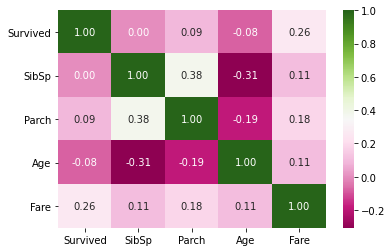

In [32]:
sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(),annot = True, fmt = '.2f', cmap ='PiYG')

<AxesSubplot:>

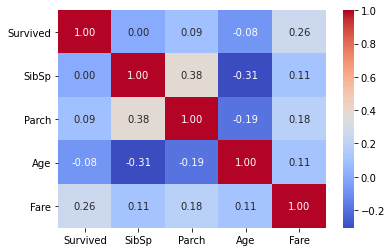

In [33]:
sns.heatmap(train[['Survived','SibSp','Parch','Age','Fare']].corr(),annot = True, fmt = '.2f', cmap ='coolwarm')

<AxesSubplot:xlabel='PassengerId', ylabel='Age'>

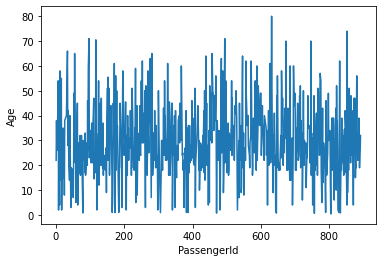

In [34]:
sns.lineplot(data=train,x='PassengerId', y="Age")

Text(0.5, 1.0, 'Passenger Age Distribution')

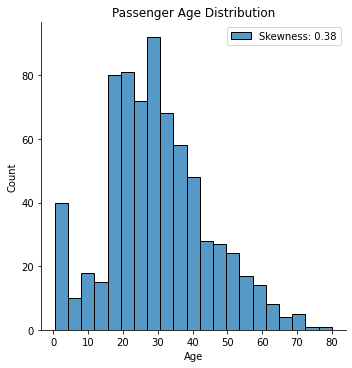

In [35]:
sns.displot(train['Age'],label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')

Text(0.5, 1.0, 'Passenger Age Distribution')

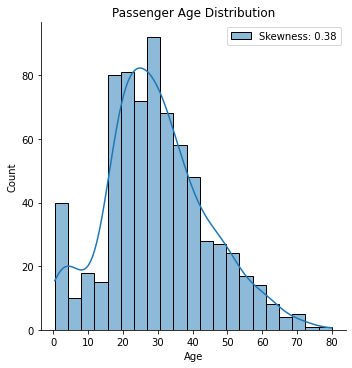

In [36]:
sns.displot(train['Age'],kde = True,label = 'Skewness: %.2f'%(train['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Passenger Age Distribution')


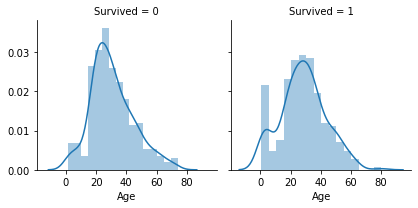

In [37]:
plot = sns.FacetGrid(train, col = 'Survived')
plot.map(sns.distplot, 'Age')

Text(0.5, 1.0, 'Passenger Age Distribution by Survival')

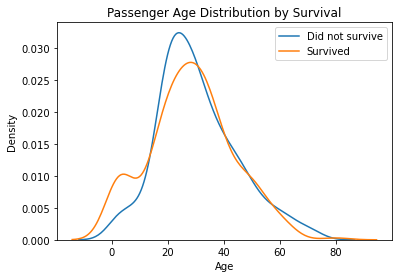

In [38]:
sns.kdeplot(train['Age'][train['Survived'] == 0], label = 'Did not survive')
sns.kdeplot(train['Age'][train['Survived'] == 1], label = 'Survived')
plt.legend(loc = 'best')
plt.xlabel('Age')
plt.title('Passenger Age Distribution by Survival')

Text(3.674999999999997, 0.5, 'Passenger fares')

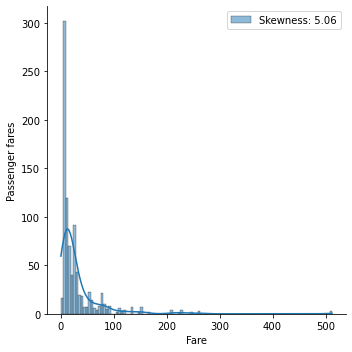

In [39]:
#fare skewness

sns.displot(train['Fare'],kde=True,label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc='best')
plt.xlabel('Fare')
plt.ylabel('Passenger fares')

Text(0, 0.5, 'Passenger Fare Distribution')

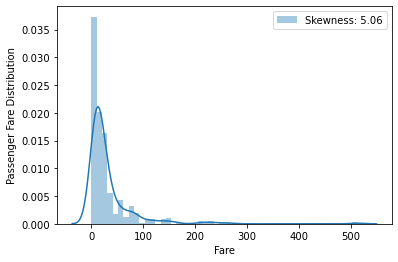

In [40]:
sns.distplot(train['Fare'], label = 'Skewness: %.2f'%(train['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

In [41]:
#missing value clearance

train = train.drop(['Ticket','Cabin'],axis = 1)
test = test.drop(['Ticket','Cabin'],axis = 1)

In [42]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [43]:
mode = train['Embarked'].dropna().mode()[0]
mode

'S'

In [44]:
train['Embarked'].fillna(mode, inplace = True)

In [45]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [46]:
median = test['Fare'].dropna().median()
median

14.4542

In [47]:
test['Fare'].fillna(median, inplace = True)

In [48]:
combinedf = pd.concat([train, test],axis = 0).reset_index(drop=True)
combinedf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
1295,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
1296,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
1297,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [49]:
combinedf.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            256
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

In [50]:
combinedf['Sex'] = combinedf['Sex'].map({'male':0,'female':1})

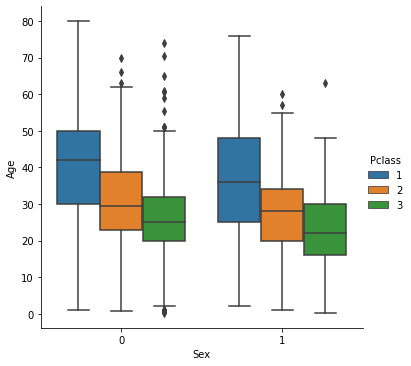

In [51]:
sns.factorplot(y = 'Age', x = 'Sex', hue = "Pclass",kind = 'box', data = combinedf)

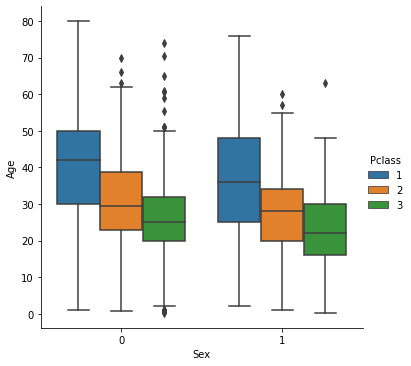

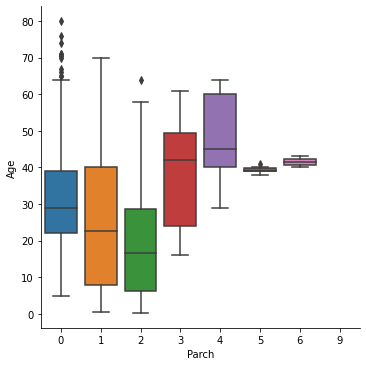

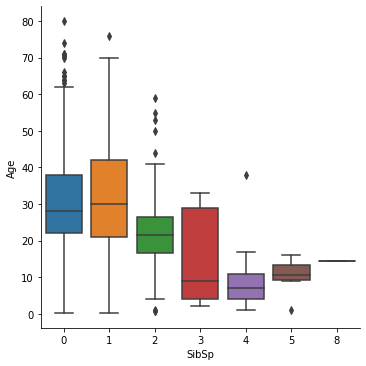

In [52]:
sns.factorplot(y = 'Age', x = 'Sex', hue = "Pclass",kind = 'box', data = combinedf)
sns.factorplot(y = 'Age', x = 'Parch',kind = 'box', data = combinedf)
sns.factorplot(y = 'Age', x = 'SibSp',kind = 'box', data = combinedf)

<AxesSubplot:>

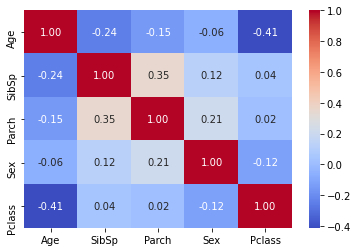

In [53]:
sns.heatmap(combinedf[['Age','SibSp','Parch','Sex','Pclass']].corr(),annot = True, fmt = '.2f', cmap ='coolwarm')

In [54]:
age_nan_locs = list(combinedf[combinedf['Age'].isnull()].index)
#len(age_nan_locs)

for index in age_nan_locs:
    median_age = combinedf['Age'].median()
    predicted_age = combinedf['Age'][(combinedf['SibSp'] == combinedf.iloc[index]['SibSp'])
                                    & (combinedf['Parch'] == combinedf.iloc[index]['Parch'])
                                    & (combinedf['Pclass'] == combinedf.iloc[index]['Pclass'])].median()
    
    if np.isnan(predicted_age):
        combinedf['Age'].iloc[index] = median_age
    else:
        combinedf['Age'].iloc[index] = predicted_age

In [55]:
combinedf.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
dtype: int64

### Data Transformation for 'Fare' Column

In [56]:
# Apply log transformation to Fare column to reduce skewness

combinedf['Fare'] = combinedf['Fare'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0, 0.5, 'Passenger Fare Distribution')

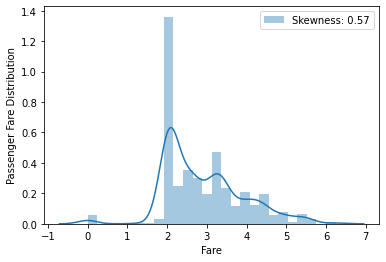

In [57]:
# After log transformation
sns.distplot(combinedf['Fare'], label = 'Skewness: %.2f'%(combinedf['Fare'].skew()))
plt.legend(loc = 'best')
plt.ylabel('Passenger Fare Distribution')

# Feature Engineering

Making new columns. Mainly which uniquely differentiate the values
- Title (Gender Distribution)
- IsAlone (Directly Dependent)
- Age Bands with Survivability

### Ttitle

In [58]:
combinedf['Title'] = [name.split(',')[1].split('.')[0].strip() for name in combinedf['Name']]
combinedf[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [59]:
combinedf['Title'].value_counts()

Mr              753
Miss            255
Mrs             197
Master           60
Rev               8
Dr                8
Col               4
Ms                2
Major             2
Mlle              2
Don               1
Lady              1
Mme               1
Capt              1
Jonkheer          1
the Countess      1
Sir               1
Dona              1
Name: Title, dtype: int64

In [60]:
combinedf['Title'].nunique()

18

In [61]:
combinedf['Title'] = combinedf['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Lady', 'Jonkheer', 'Don', 'Capt', 'the Countess',
                                             'Sir', 'Dona'], 'Rare')
combinedf['Title'] = combinedf['Title'].replace(['Mlle', 'Ms'], 'Miss')
combinedf['Title'] = combinedf['Title'].replace('Mme', 'Mrs')
# Master not converted to Mister on account that we are not converting Titles given to youngones in their respective Adult titles


<AxesSubplot:>

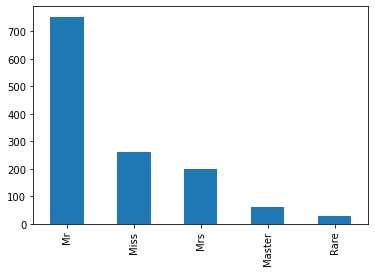

In [62]:
combinedf['Title'].value_counts().plot(kind = 'bar')

In [63]:
combinedf[['Title', 'Survived']].groupby(['Title'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Title,Survived
3,Mrs,0.793651
1,Miss,0.711111
0,Master,0.589744
4,Rare,0.347826
2,Mr,0.157895


Text(0.5, 1.0, 'Mean of survival by Title')

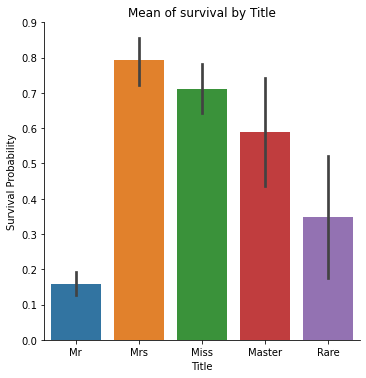

In [64]:
sns.factorplot(x = 'Title', y = 'Survived', data = combinedf, kind = 'bar')
plt.ylabel('Survival Probability')
plt.title('Mean of survival by Title')

In [65]:
combinedf = combinedf.drop('Name', axis = 1)
combinedf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0.0,3,0,22.0,1,0,1.981001,S,Mr
1,2,1.0,1,1,38.0,1,0,4.266662,C,Mrs
2,3,1.0,3,1,26.0,0,0,2.070022,S,Miss
3,4,1.0,1,1,35.0,1,0,3.972177,S,Mrs
4,5,0.0,3,0,35.0,0,0,2.085672,S,Mr


### IsAlone

In [66]:
combinedf['FamilySize'] = combinedf['SibSp'] + combinedf['Parch'] + 1
combinedf[['SibSp', 'Parch', 'FamilySize']].head(10)

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1
5,0,0,1
6,0,0,1
7,3,1,5
8,0,2,3
9,1,0,2


In [67]:
# Mean of family survival
combinedf[['FamilySize', 'Survived']].groupby('FamilySize', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.052632
7,8,0.000000
8,11,NaN


In [68]:
combinedf['IsAlone'] = 0
combinedf.loc[combinedf['FamilySize'] == 1, 'IsAlone'] = 1
combinedf[['IsAlone', 'Survived']].groupby('IsAlone', as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,IsAlone,Survived
0,0,0.514535
1,1,0.303538


In [69]:
combinedf = combinedf.drop(['SibSp', 'Parch', 'FamilySize'], axis = 1)
combinedf.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0.0,3,0,22.0,1.981001,S,Mr,0
1,2,1.0,1,1,38.0,4.266662,C,Mrs,0
2,3,1.0,3,1,26.0,2.070022,S,Miss,1
3,4,1.0,1,1,35.0,3.972177,S,Mrs,0
4,5,0.0,3,0,35.0,2.085672,S,Mr,1


### Age Bands

In [70]:
combinedf['AgeBand'] = pd.cut(combinedf['Age'], 5)
combinedf[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by = 'AgeBand')

,AgeBand,Survived
0,"(0.0902, 16.136]",0.532110
1,"(16.136, 32.102]",0.339662
2,"(32.102, 48.068]",0.412844
3,"(48.068, 64.034]",0.434783
4,"(64.034, 80.0]",0.090909


In [71]:
combinedf.loc[combinedf['Age'] <= 16.136, 'Age'] = 0
combinedf.loc[(combinedf['Age'] > 16.136) & (combinedf['Age'] <= 32.102), 'Age'] = 1
combinedf.loc[(combinedf['Age'] > 32.102) & (combinedf['Age'] <= 48.068), 'Age'] = 2
combinedf.loc[(combinedf['Age'] > 48.068) & (combinedf['Age'] <= 64.034), 'Age'] = 3
combinedf.loc[combinedf['Age'] > 64.034 , 'Age'] = 4

In [72]:
combinedf = combinedf.drop('AgeBand', axis = 1)

In [73]:
combinedf[['Age', 'Pclass']].dtypes

Age       float64
Pclass      int64
dtype: object

In [74]:
combinedf['Age'] = combinedf['Age'].astype('int')
combinedf['Age'].dtype
combinedf['Age*Class'] = combinedf['Age'] * combinedf['Pclass']
combinedf[['Age', 'Pclass', 'Age*Class']].head()

,Age,Pclass,Age*Class
0,1,3,3
1,2,1,2
2,1,3,3
3,2,1,2
4,2,3,6


# Feature Encoding

In [75]:
combinedf

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,1,0.0,3,0,1,1.981001,S,Mr,0,3
1,2,1.0,1,1,2,4.266662,C,Mrs,0,2
2,3,1.0,3,1,1,2.070022,S,Miss,1,3
3,4,1.0,1,1,2,3.972177,S,Mrs,0,2
4,5,0.0,3,0,2,2.085672,S,Mr,1,6
...,...,...,...,...,...,...,...,...,...,...
1294,1305,NaN,3,0,1,2.085672,S,Mr,1,3
1295,1306,NaN,1,1,2,4.690430,C,Rare,1,2
1296,1307,NaN,3,0,2,1.981001,S,Mr,1,6
1297,1308,NaN,3,0,1,2.085672,S,Mr,1,3


In [76]:
combinedf= pd.get_dummies(combinedf, columns = ['Title'])
combinedf= pd.get_dummies(combinedf, columns = ['Embarked'],prefix = 'PoE')
combinedf.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,PoE_C,PoE_Q,PoE_S
0,1,0.0,3,0,1,1.981001,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,4.266662,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,2.070022,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,3.972177,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,2.085672,1,6,0,0,1,0,0,0,0,1


In [77]:
combinedf['FareBand'] = pd.cut(combinedf['Fare'], 4)
combinedf[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by = 'FareBand')

,FareBand,Survived
0,"(-0.00624, 1.56]",0.062500
1,"(1.56, 3.119]",0.288719
2,"(3.119, 4.679]",0.517007
3,"(4.679, 6.239]",0.750000


In [78]:
combinedf.loc[combinedf['Fare'] <= 1.56, 'Fare'] = 0
combinedf.loc[(combinedf['Fare'] > 1.56) & (combinedf['Fare'] <= 3.119), 'Fare'] = 1
combinedf.loc[(combinedf['Fare'] > 3.119) & (combinedf['Fare'] <= 4.679), 'Fare'] = 2
combinedf.loc[combinedf['Fare'] > 4.679, 'Fare'] = 3

In [79]:
combinedf['Fare'] = combinedf['Fare'].astype('int')

In [80]:
combinedf = combinedf.drop('FareBand',axis = 1)

In [81]:
combinedf.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,PoE_C,PoE_Q,PoE_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [82]:
train = combinedf[:len(train)]
test = combinedf[len(train):]

In [83]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,PoE_C,PoE_Q,PoE_S
0,1,0.0,3,0,1,1,0,3,0,0,1,0,0,0,0,1
1,2,1.0,1,1,2,2,0,2,0,0,0,1,0,1,0,0
2,3,1.0,3,1,1,1,1,3,0,1,0,0,0,0,0,1
3,4,1.0,1,1,2,2,0,2,0,0,0,1,0,0,0,1
4,5,0.0,3,0,2,1,1,6,0,0,1,0,0,0,0,1


In [84]:
train['Survived'] = train['Survived'].astype('int')

In [85]:
test = test.drop('Survived',axis = 1)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,IsAlone,Age*Class,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,PoE_C,PoE_Q,PoE_S
881,892,3,0,2,1,1,6,0,0,1,0,0,0,1,0
882,893,3,1,2,1,0,6,0,0,0,1,0,0,0,1
883,894,2,0,3,1,1,6,0,0,1,0,0,0,1,0
884,895,3,0,1,1,1,3,0,0,1,0,0,0,0,1
885,896,3,1,1,1,0,3,0,0,0,1,0,0,0,1


# Modeling
Scikit-learn is one of the most popular libraries for machine learning in Python and that is what we will use in the modelling part of this project.

Since Titanic is a classfication problem, we will need to use classfication models, also known as classifiers, to train on our model to make predictions. I highly recommend checking out this scikit-learn documentation for more information on the different machine learning models available in their library. I have chosen the following classifiers for the job:

- Logistic regression
- Support vector machines
- K-nearest neighbours
- Gaussian naive bayes
- Perceptron
- Linear SVC
- Stochastic gradient descent
- Decision tree
- Random forest
- CatBoost


### **Split**

In [139]:
#x_train = train.drop('Survived',axis = 1)
#y_train = train['Survived']
#x_test = test.drop('PassengerId', axis = 1).copy()
print(x_train.shape,' ',y_train.shape,' ',x_test.shape)
#x_train = x_train.drop('PassengerId',axis = 1)
#print(x_train)

(881, 14)   (881,)   (418, 14)


In [87]:
X_train = train.drop('Survived', axis = 1)
Y_train = train['Survived']
X_test = test.drop('PassengerId', axis = 1).copy()
X_train = X_train.drop('PassengerId', axis =1)
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (881, 14)
Y_train shape:  (881,)
X_test shape:  (418, 14)


In [89]:
#Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train,Y_train)*100,2)
print(acc_log)

80.93


In [90]:
#Support vector machines

svc = SVC()
svc.fit(X_train,Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train,Y_train)*100,2)
print(acc_svc)

83.09


In [96]:
#K-nearest neighbours

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,Y_train)
Y_pred = knn.predict(X_test)
acc_knn0 = round(knn.score(X_train,Y_train)*100,2)
print(acc_knn0)

84.79


In [98]:
knn1 = KNeighborsClassifier(n_neighbors = 6)
knn1.fit(X_train,Y_train)
Y_pred = knn1.predict(X_test)
acc_knn1 = round(knn1.score(X_train,Y_train)*100,2)
print(acc_knn1)

84.0


In [99]:
knn2 = KNeighborsClassifier(n_neighbors = 4)
knn2.fit(X_train,Y_train)
Y_pred = knn2.predict(X_test)
acc_knn2 = round(knn2.score(X_train,Y_train)*100,2)
print(acc_knn2)

84.34


In [100]:
#Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
print(acc_linear_svc)

80.25


In [101]:
#Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.7

In [102]:
#Random Forest

random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.7

In [103]:
#Catboost Classifier

ctb = CatBoostClassifier()
ctb.fit(X_train, Y_train)
Y_pred = ctb.predict(X_train)
acc_ctb = round(ctb.score(X_train,Y_train)*100, 2)

Learning rate set to 0.00976
0:	learn: 0.6868136	total: 150ms	remaining: 2m 29s
1:	learn: 0.6798485	total: 151ms	remaining: 1m 15s
2:	learn: 0.6729520	total: 152ms	remaining: 50.6s
3:	learn: 0.6669729	total: 153ms	remaining: 38.2s
4:	learn: 0.6607853	total: 154ms	remaining: 30.7s
5:	learn: 0.6554568	total: 155ms	remaining: 25.7s
6:	learn: 0.6500727	total: 157ms	remaining: 22.2s
7:	learn: 0.6437982	total: 158ms	remaining: 19.6s
8:	learn: 0.6398272	total: 159ms	remaining: 17.5s
9:	learn: 0.6351628	total: 161ms	remaining: 15.9s
10:	learn: 0.6305969	total: 162ms	remaining: 14.5s
11:	learn: 0.6252274	total: 163ms	remaining: 13.4s
12:	learn: 0.6203165	total: 164ms	remaining: 12.5s
13:	learn: 0.6163249	total: 165ms	remaining: 11.6s
14:	learn: 0.6126752	total: 166ms	remaining: 10.9s
15:	learn: 0.6078515	total: 167ms	remaining: 10.3s
16:	learn: 0.6033553	total: 168ms	remaining: 9.71s
17:	learn: 0.5984437	total: 169ms	remaining: 9.22s
18:	learn: 0.5935188	total: 171ms	remaining: 8.81s
19:	learn:

321:	learn: 0.3656082	total: 464ms	remaining: 978ms
322:	learn: 0.3655178	total: 465ms	remaining: 976ms
323:	learn: 0.3654011	total: 466ms	remaining: 973ms
324:	learn: 0.3652962	total: 467ms	remaining: 971ms
325:	learn: 0.3651694	total: 468ms	remaining: 968ms
326:	learn: 0.3650504	total: 469ms	remaining: 966ms
327:	learn: 0.3650108	total: 470ms	remaining: 963ms
328:	learn: 0.3649231	total: 471ms	remaining: 961ms
329:	learn: 0.3648178	total: 472ms	remaining: 959ms
330:	learn: 0.3646997	total: 473ms	remaining: 956ms
331:	learn: 0.3646540	total: 474ms	remaining: 954ms
332:	learn: 0.3645286	total: 475ms	remaining: 951ms
333:	learn: 0.3644960	total: 476ms	remaining: 949ms
334:	learn: 0.3644356	total: 477ms	remaining: 946ms
335:	learn: 0.3643679	total: 478ms	remaining: 944ms
336:	learn: 0.3641977	total: 479ms	remaining: 942ms
337:	learn: 0.3640865	total: 480ms	remaining: 940ms
338:	learn: 0.3639502	total: 481ms	remaining: 938ms
339:	learn: 0.3639238	total: 481ms	remaining: 935ms
340:	learn: 

503:	learn: 0.3530158	total: 632ms	remaining: 622ms
504:	learn: 0.3529488	total: 634ms	remaining: 621ms
505:	learn: 0.3528739	total: 635ms	remaining: 619ms
506:	learn: 0.3528667	total: 635ms	remaining: 618ms
507:	learn: 0.3527930	total: 636ms	remaining: 616ms
508:	learn: 0.3527209	total: 637ms	remaining: 615ms
509:	learn: 0.3526808	total: 638ms	remaining: 613ms
510:	learn: 0.3526034	total: 639ms	remaining: 612ms
511:	learn: 0.3525333	total: 640ms	remaining: 610ms
512:	learn: 0.3525101	total: 641ms	remaining: 609ms
513:	learn: 0.3524316	total: 642ms	remaining: 607ms
514:	learn: 0.3523286	total: 643ms	remaining: 606ms
515:	learn: 0.3522349	total: 644ms	remaining: 604ms
516:	learn: 0.3521814	total: 645ms	remaining: 603ms
517:	learn: 0.3521443	total: 646ms	remaining: 601ms
518:	learn: 0.3520413	total: 647ms	remaining: 600ms
519:	learn: 0.3519833	total: 648ms	remaining: 598ms
520:	learn: 0.3519375	total: 649ms	remaining: 597ms
521:	learn: 0.3518400	total: 650ms	remaining: 595ms
522:	learn: 

686:	learn: 0.3446722	total: 800ms	remaining: 364ms
687:	learn: 0.3446728	total: 800ms	remaining: 363ms
688:	learn: 0.3446554	total: 801ms	remaining: 362ms
689:	learn: 0.3445965	total: 802ms	remaining: 360ms
690:	learn: 0.3445448	total: 803ms	remaining: 359ms
691:	learn: 0.3444661	total: 804ms	remaining: 358ms
692:	learn: 0.3444189	total: 805ms	remaining: 357ms
693:	learn: 0.3443896	total: 807ms	remaining: 356ms
694:	learn: 0.3443259	total: 808ms	remaining: 354ms
695:	learn: 0.3442944	total: 809ms	remaining: 353ms
696:	learn: 0.3442509	total: 810ms	remaining: 352ms
697:	learn: 0.3442395	total: 811ms	remaining: 351ms
698:	learn: 0.3441685	total: 812ms	remaining: 350ms
699:	learn: 0.3441189	total: 813ms	remaining: 348ms
700:	learn: 0.3440922	total: 814ms	remaining: 347ms
701:	learn: 0.3440870	total: 815ms	remaining: 346ms
702:	learn: 0.3440379	total: 816ms	remaining: 345ms
703:	learn: 0.3439938	total: 817ms	remaining: 344ms
704:	learn: 0.3439472	total: 818ms	remaining: 342ms
705:	learn: 

863:	learn: 0.3374722	total: 968ms	remaining: 152ms
864:	learn: 0.3374353	total: 969ms	remaining: 151ms
865:	learn: 0.3373958	total: 970ms	remaining: 150ms
866:	learn: 0.3373583	total: 971ms	remaining: 149ms
867:	learn: 0.3373193	total: 972ms	remaining: 148ms
868:	learn: 0.3372767	total: 973ms	remaining: 147ms
869:	learn: 0.3372207	total: 974ms	remaining: 146ms
870:	learn: 0.3371382	total: 975ms	remaining: 144ms
871:	learn: 0.3370889	total: 976ms	remaining: 143ms
872:	learn: 0.3370604	total: 977ms	remaining: 142ms
873:	learn: 0.3370195	total: 978ms	remaining: 141ms
874:	learn: 0.3369685	total: 979ms	remaining: 140ms
875:	learn: 0.3369153	total: 980ms	remaining: 139ms
876:	learn: 0.3368910	total: 981ms	remaining: 138ms
877:	learn: 0.3368585	total: 982ms	remaining: 136ms
878:	learn: 0.3368311	total: 983ms	remaining: 135ms
879:	learn: 0.3367971	total: 984ms	remaining: 134ms
880:	learn: 0.3367762	total: 985ms	remaining: 133ms
881:	learn: 0.3367425	total: 986ms	remaining: 132ms
882:	learn: 

In [104]:
acc_ctb

85.7

## Evaluation

In [111]:
accuracy = pd.DataFrame({'Model':['Support Vector Machine','Logistic Regression',
                                  'KNN 1','KNN 2','KNN 3','Linear SVC'
                        ,'Decision Tree','Random Forest','CatBoost Classifier'],
                       'Score':[acc_svc,acc_log,acc_knn0,acc_knn1,
                                 acc_knn2,acc_linear_svc,
                                 acc_decision_tree,acc_random_forest,acc_ctb]})
accuracy.sort_values(by = 'Score',ignore_index = True)

,Model,Score
0,Linear SVC,80.25
1,Logistic Regression,80.93
2,Support Vector Machine,83.09
3,KNN 2,84.00
4,KNN 3,84.34
5,KNN 1,84.79
6,Decision Tree,85.70
7,Random Forest,85.70
8,CatBoost Classifier,85.70


Text(0.5, 1.0, 'Accuracy of the Models')

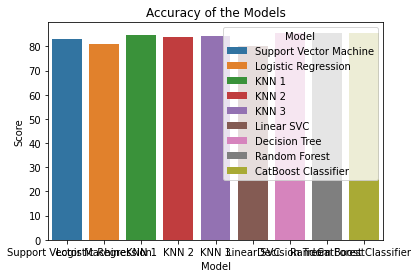

In [118]:
sns.barplot(x="Model", y="Score",hue = 'Model', data=accuracy, dodge = False)
plt.xlabel('Model')
plt.title('Accuracy of the Models')

## K-Fold Cross Val

In [119]:
# Make list of all classifiers


classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(KNeighborsClassifier(n_neighbors = 5))
classifiers.append(KNeighborsClassifier(n_neighbors = 6))
classifiers.append(KNeighborsClassifier(n_neighbors = 4))
classifiers.append(LinearSVC())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
classifiers.append(CatBoostClassifier())

len(classifiers)

9

In [121]:
crossval_results = []
for classifier in classifiers:
    crossval_results.append(cross_val_score(classifier,X_train,Y_train,scoring = 'accuracy',cv = 10))

Learning rate set to 0.009326
0:	learn: 0.6870154	total: 877us	remaining: 877ms
1:	learn: 0.6803102	total: 1.74ms	remaining: 870ms
2:	learn: 0.6743326	total: 2.67ms	remaining: 889ms
3:	learn: 0.6684760	total: 3.65ms	remaining: 910ms
4:	learn: 0.6624557	total: 4.42ms	remaining: 879ms
5:	learn: 0.6573314	total: 5.29ms	remaining: 877ms
6:	learn: 0.6520748	total: 6.27ms	remaining: 890ms
7:	learn: 0.6460856	total: 7.09ms	remaining: 879ms
8:	learn: 0.6422711	total: 7.77ms	remaining: 856ms
9:	learn: 0.6376840	total: 8.68ms	remaining: 859ms
10:	learn: 0.6326541	total: 9.64ms	remaining: 867ms
11:	learn: 0.6272334	total: 10.5ms	remaining: 866ms
12:	learn: 0.6224744	total: 11.3ms	remaining: 860ms
13:	learn: 0.6175199	total: 12.1ms	remaining: 851ms
14:	learn: 0.6124417	total: 13.1ms	remaining: 857ms
15:	learn: 0.6097890	total: 13.6ms	remaining: 836ms
16:	learn: 0.6050558	total: 14.5ms	remaining: 838ms
17:	learn: 0.6004952	total: 15.5ms	remaining: 844ms
18:	learn: 0.5958639	total: 16.3ms	remaining:

182:	learn: 0.3854771	total: 159ms	remaining: 709ms
183:	learn: 0.3851276	total: 160ms	remaining: 709ms
184:	learn: 0.3847248	total: 161ms	remaining: 708ms
185:	learn: 0.3845056	total: 162ms	remaining: 708ms
186:	learn: 0.3841258	total: 163ms	remaining: 707ms
187:	learn: 0.3839180	total: 164ms	remaining: 706ms
188:	learn: 0.3837074	total: 164ms	remaining: 706ms
189:	learn: 0.3836852	total: 165ms	remaining: 704ms
190:	learn: 0.3832794	total: 166ms	remaining: 703ms
191:	learn: 0.3829478	total: 167ms	remaining: 702ms
192:	learn: 0.3826157	total: 168ms	remaining: 701ms
193:	learn: 0.3823455	total: 169ms	remaining: 700ms
194:	learn: 0.3820073	total: 170ms	remaining: 700ms
195:	learn: 0.3818135	total: 171ms	remaining: 700ms
196:	learn: 0.3815871	total: 172ms	remaining: 701ms
197:	learn: 0.3813872	total: 173ms	remaining: 701ms
198:	learn: 0.3812887	total: 174ms	remaining: 699ms
199:	learn: 0.3811449	total: 174ms	remaining: 698ms
200:	learn: 0.3808502	total: 175ms	remaining: 697ms
201:	learn: 

362:	learn: 0.3574100	total: 323ms	remaining: 566ms
363:	learn: 0.3573566	total: 324ms	remaining: 565ms
364:	learn: 0.3573334	total: 324ms	remaining: 564ms
365:	learn: 0.3572311	total: 325ms	remaining: 564ms
366:	learn: 0.3571199	total: 326ms	remaining: 563ms
367:	learn: 0.3570880	total: 327ms	remaining: 562ms
368:	learn: 0.3569251	total: 328ms	remaining: 561ms
369:	learn: 0.3568497	total: 329ms	remaining: 560ms
370:	learn: 0.3567735	total: 330ms	remaining: 559ms
371:	learn: 0.3567326	total: 331ms	remaining: 558ms
372:	learn: 0.3566332	total: 332ms	remaining: 557ms
373:	learn: 0.3564693	total: 333ms	remaining: 557ms
374:	learn: 0.3563679	total: 333ms	remaining: 556ms
375:	learn: 0.3563088	total: 334ms	remaining: 555ms
376:	learn: 0.3561734	total: 335ms	remaining: 554ms
377:	learn: 0.3560766	total: 336ms	remaining: 553ms
378:	learn: 0.3560618	total: 337ms	remaining: 553ms
379:	learn: 0.3559649	total: 339ms	remaining: 552ms
380:	learn: 0.3558443	total: 339ms	remaining: 552ms
381:	learn: 

547:	learn: 0.3443029	total: 489ms	remaining: 403ms
548:	learn: 0.3442957	total: 490ms	remaining: 402ms
549:	learn: 0.3442495	total: 491ms	remaining: 401ms
550:	learn: 0.3441675	total: 492ms	remaining: 401ms
551:	learn: 0.3440932	total: 493ms	remaining: 400ms
552:	learn: 0.3440398	total: 494ms	remaining: 399ms
553:	learn: 0.3439665	total: 495ms	remaining: 398ms
554:	learn: 0.3438358	total: 496ms	remaining: 398ms
555:	learn: 0.3438297	total: 497ms	remaining: 397ms
556:	learn: 0.3438278	total: 497ms	remaining: 396ms
557:	learn: 0.3437445	total: 498ms	remaining: 395ms
558:	learn: 0.3437039	total: 499ms	remaining: 394ms
559:	learn: 0.3436563	total: 500ms	remaining: 393ms
560:	learn: 0.3436320	total: 501ms	remaining: 392ms
561:	learn: 0.3435094	total: 502ms	remaining: 391ms
562:	learn: 0.3434800	total: 503ms	remaining: 390ms
563:	learn: 0.3434155	total: 504ms	remaining: 389ms
564:	learn: 0.3434003	total: 504ms	remaining: 388ms
565:	learn: 0.3433925	total: 505ms	remaining: 387ms
566:	learn: 

732:	learn: 0.3355333	total: 656ms	remaining: 239ms
733:	learn: 0.3354703	total: 657ms	remaining: 238ms
734:	learn: 0.3354140	total: 658ms	remaining: 237ms
735:	learn: 0.3353499	total: 659ms	remaining: 236ms
736:	learn: 0.3353106	total: 660ms	remaining: 235ms
737:	learn: 0.3353003	total: 661ms	remaining: 235ms
738:	learn: 0.3352183	total: 661ms	remaining: 234ms
739:	learn: 0.3351840	total: 662ms	remaining: 233ms
740:	learn: 0.3351275	total: 663ms	remaining: 232ms
741:	learn: 0.3350593	total: 664ms	remaining: 231ms
742:	learn: 0.3350508	total: 665ms	remaining: 230ms
743:	learn: 0.3349968	total: 666ms	remaining: 229ms
744:	learn: 0.3349490	total: 667ms	remaining: 228ms
745:	learn: 0.3348667	total: 668ms	remaining: 227ms
746:	learn: 0.3347958	total: 669ms	remaining: 227ms
747:	learn: 0.3347202	total: 670ms	remaining: 226ms
748:	learn: 0.3346524	total: 671ms	remaining: 225ms
749:	learn: 0.3345535	total: 672ms	remaining: 224ms
750:	learn: 0.3344783	total: 673ms	remaining: 223ms
751:	learn: 

917:	learn: 0.3270089	total: 821ms	remaining: 73.3ms
918:	learn: 0.3269784	total: 822ms	remaining: 72.4ms
919:	learn: 0.3269523	total: 823ms	remaining: 71.5ms
920:	learn: 0.3269135	total: 824ms	remaining: 70.7ms
921:	learn: 0.3268438	total: 825ms	remaining: 69.8ms
922:	learn: 0.3267925	total: 826ms	remaining: 68.9ms
923:	learn: 0.3267579	total: 827ms	remaining: 68ms
924:	learn: 0.3267549	total: 828ms	remaining: 67.1ms
925:	learn: 0.3267257	total: 829ms	remaining: 66.2ms
926:	learn: 0.3266700	total: 830ms	remaining: 65.3ms
927:	learn: 0.3266278	total: 831ms	remaining: 64.5ms
928:	learn: 0.3265920	total: 832ms	remaining: 63.6ms
929:	learn: 0.3265699	total: 833ms	remaining: 62.7ms
930:	learn: 0.3265288	total: 834ms	remaining: 61.8ms
931:	learn: 0.3264957	total: 835ms	remaining: 60.9ms
932:	learn: 0.3264573	total: 836ms	remaining: 60ms
933:	learn: 0.3263963	total: 837ms	remaining: 59.2ms
934:	learn: 0.3263416	total: 838ms	remaining: 58.3ms
935:	learn: 0.3262955	total: 839ms	remaining: 57.4

243:	learn: 0.3779471	total: 218ms	remaining: 676ms
244:	learn: 0.3777557	total: 219ms	remaining: 675ms
245:	learn: 0.3776268	total: 220ms	remaining: 674ms
246:	learn: 0.3776128	total: 220ms	remaining: 672ms
247:	learn: 0.3774967	total: 221ms	remaining: 671ms
248:	learn: 0.3773384	total: 222ms	remaining: 670ms
249:	learn: 0.3771732	total: 223ms	remaining: 670ms
250:	learn: 0.3770833	total: 224ms	remaining: 669ms
251:	learn: 0.3769373	total: 225ms	remaining: 669ms
252:	learn: 0.3767993	total: 226ms	remaining: 668ms
253:	learn: 0.3766648	total: 227ms	remaining: 668ms
254:	learn: 0.3763919	total: 228ms	remaining: 667ms
255:	learn: 0.3761774	total: 229ms	remaining: 666ms
256:	learn: 0.3760099	total: 230ms	remaining: 666ms
257:	learn: 0.3758748	total: 231ms	remaining: 665ms
258:	learn: 0.3757512	total: 232ms	remaining: 664ms
259:	learn: 0.3756243	total: 233ms	remaining: 663ms
260:	learn: 0.3754744	total: 234ms	remaining: 662ms
261:	learn: 0.3752939	total: 235ms	remaining: 661ms
262:	learn: 

429:	learn: 0.3583366	total: 385ms	remaining: 511ms
430:	learn: 0.3582873	total: 386ms	remaining: 510ms
431:	learn: 0.3581703	total: 387ms	remaining: 509ms
432:	learn: 0.3580649	total: 388ms	remaining: 508ms
433:	learn: 0.3579957	total: 389ms	remaining: 507ms
434:	learn: 0.3578894	total: 390ms	remaining: 506ms
435:	learn: 0.3577667	total: 391ms	remaining: 505ms
436:	learn: 0.3577073	total: 392ms	remaining: 504ms
437:	learn: 0.3576160	total: 393ms	remaining: 504ms
438:	learn: 0.3575370	total: 393ms	remaining: 503ms
439:	learn: 0.3574546	total: 394ms	remaining: 502ms
440:	learn: 0.3573719	total: 395ms	remaining: 501ms
441:	learn: 0.3573114	total: 396ms	remaining: 500ms
442:	learn: 0.3572069	total: 397ms	remaining: 499ms
443:	learn: 0.3571342	total: 398ms	remaining: 499ms
444:	learn: 0.3571164	total: 399ms	remaining: 497ms
445:	learn: 0.3570368	total: 400ms	remaining: 497ms
446:	learn: 0.3569088	total: 401ms	remaining: 496ms
447:	learn: 0.3568581	total: 402ms	remaining: 495ms
448:	learn: 

610:	learn: 0.3476707	total: 552ms	remaining: 351ms
611:	learn: 0.3476236	total: 553ms	remaining: 351ms
612:	learn: 0.3475814	total: 554ms	remaining: 350ms
613:	learn: 0.3475417	total: 555ms	remaining: 349ms
614:	learn: 0.3474860	total: 556ms	remaining: 348ms
615:	learn: 0.3474367	total: 557ms	remaining: 347ms
616:	learn: 0.3473680	total: 557ms	remaining: 346ms
617:	learn: 0.3473223	total: 558ms	remaining: 345ms
618:	learn: 0.3472803	total: 559ms	remaining: 344ms
619:	learn: 0.3472150	total: 560ms	remaining: 343ms
620:	learn: 0.3471987	total: 561ms	remaining: 342ms
621:	learn: 0.3471466	total: 562ms	remaining: 342ms
622:	learn: 0.3470872	total: 563ms	remaining: 341ms
623:	learn: 0.3470397	total: 564ms	remaining: 340ms
624:	learn: 0.3470133	total: 565ms	remaining: 339ms
625:	learn: 0.3469349	total: 566ms	remaining: 338ms
626:	learn: 0.3468427	total: 567ms	remaining: 337ms
627:	learn: 0.3467943	total: 568ms	remaining: 336ms
628:	learn: 0.3467662	total: 569ms	remaining: 335ms
629:	learn: 

788:	learn: 0.3390372	total: 720ms	remaining: 193ms
789:	learn: 0.3389630	total: 721ms	remaining: 192ms
790:	learn: 0.3389085	total: 722ms	remaining: 191ms
791:	learn: 0.3388793	total: 723ms	remaining: 190ms
792:	learn: 0.3388316	total: 724ms	remaining: 189ms
793:	learn: 0.3387942	total: 725ms	remaining: 188ms
794:	learn: 0.3387195	total: 726ms	remaining: 187ms
795:	learn: 0.3386998	total: 727ms	remaining: 186ms
796:	learn: 0.3386627	total: 728ms	remaining: 185ms
797:	learn: 0.3386325	total: 729ms	remaining: 185ms
798:	learn: 0.3385818	total: 730ms	remaining: 184ms
799:	learn: 0.3385328	total: 731ms	remaining: 183ms
800:	learn: 0.3384952	total: 732ms	remaining: 182ms
801:	learn: 0.3384511	total: 733ms	remaining: 181ms
802:	learn: 0.3383978	total: 734ms	remaining: 180ms
803:	learn: 0.3383568	total: 735ms	remaining: 179ms
804:	learn: 0.3383181	total: 736ms	remaining: 178ms
805:	learn: 0.3382405	total: 737ms	remaining: 177ms
806:	learn: 0.3381496	total: 738ms	remaining: 176ms
807:	learn: 

967:	learn: 0.3321816	total: 887ms	remaining: 29.3ms
968:	learn: 0.3321540	total: 888ms	remaining: 28.4ms
969:	learn: 0.3321303	total: 889ms	remaining: 27.5ms
970:	learn: 0.3320783	total: 890ms	remaining: 26.6ms
971:	learn: 0.3320547	total: 891ms	remaining: 25.7ms
972:	learn: 0.3320198	total: 892ms	remaining: 24.8ms
973:	learn: 0.3320052	total: 893ms	remaining: 23.8ms
974:	learn: 0.3319661	total: 894ms	remaining: 22.9ms
975:	learn: 0.3319387	total: 895ms	remaining: 22ms
976:	learn: 0.3319023	total: 896ms	remaining: 21.1ms
977:	learn: 0.3318618	total: 898ms	remaining: 20.2ms
978:	learn: 0.3318279	total: 899ms	remaining: 19.3ms
979:	learn: 0.3318019	total: 900ms	remaining: 18.4ms
980:	learn: 0.3317592	total: 901ms	remaining: 17.4ms
981:	learn: 0.3317063	total: 902ms	remaining: 16.5ms
982:	learn: 0.3316690	total: 902ms	remaining: 15.6ms
983:	learn: 0.3316177	total: 903ms	remaining: 14.7ms
984:	learn: 0.3315891	total: 904ms	remaining: 13.8ms
985:	learn: 0.3315340	total: 905ms	remaining: 12

125:	learn: 0.3929872	total: 110ms	remaining: 761ms
126:	learn: 0.3921231	total: 111ms	remaining: 762ms
127:	learn: 0.3916329	total: 112ms	remaining: 762ms
128:	learn: 0.3912404	total: 113ms	remaining: 760ms
129:	learn: 0.3907579	total: 113ms	remaining: 759ms
130:	learn: 0.3904153	total: 114ms	remaining: 759ms
131:	learn: 0.3896216	total: 115ms	remaining: 758ms
132:	learn: 0.3890522	total: 116ms	remaining: 758ms
133:	learn: 0.3886394	total: 117ms	remaining: 758ms
134:	learn: 0.3878328	total: 118ms	remaining: 758ms
135:	learn: 0.3873657	total: 119ms	remaining: 757ms
136:	learn: 0.3868193	total: 120ms	remaining: 758ms
137:	learn: 0.3864109	total: 121ms	remaining: 757ms
138:	learn: 0.3861368	total: 122ms	remaining: 755ms
139:	learn: 0.3857450	total: 123ms	remaining: 754ms
140:	learn: 0.3851175	total: 124ms	remaining: 753ms
141:	learn: 0.3847416	total: 125ms	remaining: 754ms
142:	learn: 0.3839354	total: 126ms	remaining: 753ms
143:	learn: 0.3836930	total: 127ms	remaining: 752ms
144:	learn: 

305:	learn: 0.3477341	total: 276ms	remaining: 625ms
306:	learn: 0.3476522	total: 277ms	remaining: 624ms
307:	learn: 0.3475402	total: 278ms	remaining: 623ms
308:	learn: 0.3473733	total: 278ms	remaining: 623ms
309:	learn: 0.3472884	total: 280ms	remaining: 622ms
310:	learn: 0.3471860	total: 280ms	remaining: 621ms
311:	learn: 0.3471409	total: 281ms	remaining: 620ms
312:	learn: 0.3469741	total: 282ms	remaining: 620ms
313:	learn: 0.3467120	total: 283ms	remaining: 619ms
314:	learn: 0.3466240	total: 284ms	remaining: 618ms
315:	learn: 0.3465507	total: 285ms	remaining: 617ms
316:	learn: 0.3464063	total: 286ms	remaining: 616ms
317:	learn: 0.3463112	total: 287ms	remaining: 615ms
318:	learn: 0.3462499	total: 288ms	remaining: 614ms
319:	learn: 0.3461178	total: 289ms	remaining: 614ms
320:	learn: 0.3460191	total: 290ms	remaining: 613ms
321:	learn: 0.3459147	total: 291ms	remaining: 612ms
322:	learn: 0.3458326	total: 291ms	remaining: 611ms
323:	learn: 0.3456960	total: 292ms	remaining: 610ms
324:	learn: 

490:	learn: 0.3329213	total: 439ms	remaining: 455ms
491:	learn: 0.3328447	total: 440ms	remaining: 454ms
492:	learn: 0.3327894	total: 441ms	remaining: 453ms
493:	learn: 0.3327575	total: 442ms	remaining: 452ms
494:	learn: 0.3327065	total: 443ms	remaining: 452ms
495:	learn: 0.3326136	total: 444ms	remaining: 451ms
496:	learn: 0.3326032	total: 444ms	remaining: 450ms
497:	learn: 0.3325845	total: 445ms	remaining: 449ms
498:	learn: 0.3325488	total: 446ms	remaining: 448ms
499:	learn: 0.3325433	total: 446ms	remaining: 446ms
500:	learn: 0.3325170	total: 447ms	remaining: 445ms
501:	learn: 0.3324630	total: 448ms	remaining: 445ms
502:	learn: 0.3323831	total: 449ms	remaining: 444ms
503:	learn: 0.3323758	total: 450ms	remaining: 443ms
504:	learn: 0.3323022	total: 451ms	remaining: 442ms
505:	learn: 0.3321883	total: 452ms	remaining: 441ms
506:	learn: 0.3321060	total: 453ms	remaining: 440ms
507:	learn: 0.3320799	total: 454ms	remaining: 439ms
508:	learn: 0.3320005	total: 455ms	remaining: 439ms
509:	learn: 

678:	learn: 0.3232097	total: 605ms	remaining: 286ms
679:	learn: 0.3231623	total: 606ms	remaining: 285ms
680:	learn: 0.3230845	total: 607ms	remaining: 284ms
681:	learn: 0.3230837	total: 607ms	remaining: 283ms
682:	learn: 0.3230371	total: 608ms	remaining: 282ms
683:	learn: 0.3229962	total: 609ms	remaining: 281ms
684:	learn: 0.3228946	total: 610ms	remaining: 280ms
685:	learn: 0.3228731	total: 611ms	remaining: 280ms
686:	learn: 0.3228361	total: 612ms	remaining: 279ms
687:	learn: 0.3227090	total: 613ms	remaining: 278ms
688:	learn: 0.3226548	total: 613ms	remaining: 277ms
689:	learn: 0.3226548	total: 614ms	remaining: 276ms
690:	learn: 0.3226388	total: 615ms	remaining: 275ms
691:	learn: 0.3226162	total: 616ms	remaining: 274ms
692:	learn: 0.3225976	total: 616ms	remaining: 273ms
693:	learn: 0.3225101	total: 617ms	remaining: 272ms
694:	learn: 0.3224633	total: 618ms	remaining: 271ms
695:	learn: 0.3224341	total: 619ms	remaining: 270ms
696:	learn: 0.3223690	total: 620ms	remaining: 269ms
697:	learn: 

867:	learn: 0.3152546	total: 771ms	remaining: 117ms
868:	learn: 0.3151838	total: 772ms	remaining: 116ms
869:	learn: 0.3151391	total: 773ms	remaining: 116ms
870:	learn: 0.3151084	total: 774ms	remaining: 115ms
871:	learn: 0.3150372	total: 775ms	remaining: 114ms
872:	learn: 0.3150073	total: 776ms	remaining: 113ms
873:	learn: 0.3149642	total: 777ms	remaining: 112ms
874:	learn: 0.3149339	total: 778ms	remaining: 111ms
875:	learn: 0.3149009	total: 778ms	remaining: 110ms
876:	learn: 0.3148733	total: 779ms	remaining: 109ms
877:	learn: 0.3148120	total: 781ms	remaining: 108ms
878:	learn: 0.3147605	total: 782ms	remaining: 108ms
879:	learn: 0.3147337	total: 783ms	remaining: 107ms
880:	learn: 0.3147003	total: 784ms	remaining: 106ms
881:	learn: 0.3146746	total: 785ms	remaining: 105ms
882:	learn: 0.3146309	total: 786ms	remaining: 104ms
883:	learn: 0.3145748	total: 787ms	remaining: 103ms
884:	learn: 0.3145399	total: 788ms	remaining: 102ms
885:	learn: 0.3144996	total: 789ms	remaining: 102ms
886:	learn: 

197:	learn: 0.3873273	total: 181ms	remaining: 732ms
198:	learn: 0.3871500	total: 182ms	remaining: 731ms
199:	learn: 0.3868027	total: 183ms	remaining: 731ms
200:	learn: 0.3866815	total: 184ms	remaining: 730ms
201:	learn: 0.3866382	total: 184ms	remaining: 728ms
202:	learn: 0.3863280	total: 185ms	remaining: 727ms
203:	learn: 0.3861432	total: 186ms	remaining: 726ms
204:	learn: 0.3857165	total: 187ms	remaining: 726ms
205:	learn: 0.3854848	total: 189ms	remaining: 728ms
206:	learn: 0.3852307	total: 190ms	remaining: 727ms
207:	learn: 0.3849459	total: 191ms	remaining: 726ms
208:	learn: 0.3847377	total: 192ms	remaining: 725ms
209:	learn: 0.3846511	total: 192ms	remaining: 724ms
210:	learn: 0.3843569	total: 193ms	remaining: 723ms
211:	learn: 0.3841774	total: 194ms	remaining: 722ms
212:	learn: 0.3839375	total: 195ms	remaining: 721ms
213:	learn: 0.3836683	total: 196ms	remaining: 721ms
214:	learn: 0.3834714	total: 197ms	remaining: 720ms
215:	learn: 0.3832695	total: 198ms	remaining: 719ms
216:	learn: 

386:	learn: 0.3631235	total: 347ms	remaining: 550ms
387:	learn: 0.3630440	total: 348ms	remaining: 549ms
388:	learn: 0.3629814	total: 349ms	remaining: 548ms
389:	learn: 0.3629051	total: 350ms	remaining: 548ms
390:	learn: 0.3627473	total: 351ms	remaining: 547ms
391:	learn: 0.3626005	total: 352ms	remaining: 546ms
392:	learn: 0.3624490	total: 353ms	remaining: 545ms
393:	learn: 0.3623968	total: 354ms	remaining: 545ms
394:	learn: 0.3623955	total: 355ms	remaining: 543ms
395:	learn: 0.3623445	total: 356ms	remaining: 542ms
396:	learn: 0.3622168	total: 357ms	remaining: 542ms
397:	learn: 0.3621876	total: 358ms	remaining: 541ms
398:	learn: 0.3621097	total: 359ms	remaining: 541ms
399:	learn: 0.3620870	total: 360ms	remaining: 540ms
400:	learn: 0.3619178	total: 361ms	remaining: 539ms
401:	learn: 0.3618634	total: 362ms	remaining: 538ms
402:	learn: 0.3617209	total: 363ms	remaining: 537ms
403:	learn: 0.3616415	total: 364ms	remaining: 536ms
404:	learn: 0.3616270	total: 364ms	remaining: 535ms
405:	learn: 

576:	learn: 0.3513149	total: 514ms	remaining: 377ms
577:	learn: 0.3512334	total: 515ms	remaining: 376ms
578:	learn: 0.3511513	total: 516ms	remaining: 375ms
579:	learn: 0.3511460	total: 517ms	remaining: 374ms
580:	learn: 0.3511004	total: 518ms	remaining: 373ms
581:	learn: 0.3510117	total: 518ms	remaining: 372ms
582:	learn: 0.3509473	total: 519ms	remaining: 371ms
583:	learn: 0.3508461	total: 520ms	remaining: 371ms
584:	learn: 0.3508063	total: 521ms	remaining: 370ms
585:	learn: 0.3507693	total: 522ms	remaining: 369ms
586:	learn: 0.3507377	total: 523ms	remaining: 368ms
587:	learn: 0.3506740	total: 524ms	remaining: 367ms
588:	learn: 0.3505824	total: 525ms	remaining: 367ms
589:	learn: 0.3505138	total: 526ms	remaining: 366ms
590:	learn: 0.3504977	total: 527ms	remaining: 365ms
591:	learn: 0.3503989	total: 528ms	remaining: 364ms
592:	learn: 0.3503124	total: 529ms	remaining: 363ms
593:	learn: 0.3502265	total: 530ms	remaining: 362ms
594:	learn: 0.3502239	total: 531ms	remaining: 361ms
595:	learn: 

762:	learn: 0.3424275	total: 680ms	remaining: 211ms
763:	learn: 0.3424117	total: 681ms	remaining: 210ms
764:	learn: 0.3423755	total: 682ms	remaining: 210ms
765:	learn: 0.3423356	total: 683ms	remaining: 209ms
766:	learn: 0.3422723	total: 684ms	remaining: 208ms
767:	learn: 0.3422121	total: 685ms	remaining: 207ms
768:	learn: 0.3421369	total: 686ms	remaining: 206ms
769:	learn: 0.3420843	total: 687ms	remaining: 205ms
770:	learn: 0.3420384	total: 688ms	remaining: 204ms
771:	learn: 0.3419839	total: 689ms	remaining: 204ms
772:	learn: 0.3419307	total: 691ms	remaining: 203ms
773:	learn: 0.3418586	total: 692ms	remaining: 202ms
774:	learn: 0.3418059	total: 693ms	remaining: 201ms
775:	learn: 0.3417595	total: 694ms	remaining: 200ms
776:	learn: 0.3416980	total: 695ms	remaining: 199ms
777:	learn: 0.3416511	total: 696ms	remaining: 199ms
778:	learn: 0.3416335	total: 697ms	remaining: 198ms
779:	learn: 0.3416034	total: 698ms	remaining: 197ms
780:	learn: 0.3415891	total: 699ms	remaining: 196ms
781:	learn: 

940:	learn: 0.3350733	total: 843ms	remaining: 52.9ms
941:	learn: 0.3350342	total: 844ms	remaining: 52ms
942:	learn: 0.3349965	total: 845ms	remaining: 51.1ms
943:	learn: 0.3349464	total: 846ms	remaining: 50.2ms
944:	learn: 0.3349091	total: 847ms	remaining: 49.3ms
945:	learn: 0.3348744	total: 848ms	remaining: 48.4ms
946:	learn: 0.3348338	total: 849ms	remaining: 47.5ms
947:	learn: 0.3348132	total: 850ms	remaining: 46.6ms
948:	learn: 0.3347755	total: 851ms	remaining: 45.7ms
949:	learn: 0.3347458	total: 852ms	remaining: 44.8ms
950:	learn: 0.3347147	total: 853ms	remaining: 43.9ms
951:	learn: 0.3347144	total: 853ms	remaining: 43ms
952:	learn: 0.3346787	total: 854ms	remaining: 42.1ms
953:	learn: 0.3346325	total: 855ms	remaining: 41.2ms
954:	learn: 0.3346082	total: 856ms	remaining: 40.3ms
955:	learn: 0.3345798	total: 857ms	remaining: 39.4ms
956:	learn: 0.3345586	total: 858ms	remaining: 38.5ms
957:	learn: 0.3345203	total: 859ms	remaining: 37.6ms
958:	learn: 0.3344821	total: 859ms	remaining: 36.7

102:	learn: 0.4314580	total: 89.5ms	remaining: 779ms
103:	learn: 0.4304447	total: 90.4ms	remaining: 779ms
104:	learn: 0.4299022	total: 91.2ms	remaining: 778ms
105:	learn: 0.4289985	total: 92.2ms	remaining: 778ms
106:	learn: 0.4280551	total: 93.1ms	remaining: 777ms
107:	learn: 0.4272230	total: 94.1ms	remaining: 777ms
108:	learn: 0.4263613	total: 95ms	remaining: 777ms
109:	learn: 0.4260401	total: 95.7ms	remaining: 774ms
110:	learn: 0.4256206	total: 96.7ms	remaining: 774ms
111:	learn: 0.4246802	total: 97.7ms	remaining: 774ms
112:	learn: 0.4239744	total: 98.8ms	remaining: 775ms
113:	learn: 0.4236559	total: 99.6ms	remaining: 774ms
114:	learn: 0.4226697	total: 101ms	remaining: 774ms
115:	learn: 0.4217708	total: 101ms	remaining: 773ms
116:	learn: 0.4213140	total: 102ms	remaining: 773ms
117:	learn: 0.4206150	total: 103ms	remaining: 772ms
118:	learn: 0.4197806	total: 104ms	remaining: 773ms
119:	learn: 0.4193042	total: 105ms	remaining: 772ms
120:	learn: 0.4188553	total: 106ms	remaining: 772ms
12

288:	learn: 0.3727722	total: 256ms	remaining: 631ms
289:	learn: 0.3726266	total: 257ms	remaining: 630ms
290:	learn: 0.3726111	total: 258ms	remaining: 629ms
291:	learn: 0.3724981	total: 259ms	remaining: 628ms
292:	learn: 0.3723722	total: 260ms	remaining: 627ms
293:	learn: 0.3723398	total: 261ms	remaining: 626ms
294:	learn: 0.3722007	total: 262ms	remaining: 626ms
295:	learn: 0.3721773	total: 262ms	remaining: 624ms
296:	learn: 0.3720428	total: 263ms	remaining: 623ms
297:	learn: 0.3718871	total: 264ms	remaining: 622ms
298:	learn: 0.3717492	total: 265ms	remaining: 622ms
299:	learn: 0.3716073	total: 266ms	remaining: 621ms
300:	learn: 0.3715323	total: 267ms	remaining: 620ms
301:	learn: 0.3714117	total: 268ms	remaining: 619ms
302:	learn: 0.3713260	total: 269ms	remaining: 618ms
303:	learn: 0.3712790	total: 270ms	remaining: 617ms
304:	learn: 0.3710613	total: 271ms	remaining: 617ms
305:	learn: 0.3710231	total: 271ms	remaining: 615ms
306:	learn: 0.3708980	total: 272ms	remaining: 615ms
307:	learn: 

479:	learn: 0.3567425	total: 423ms	remaining: 458ms
480:	learn: 0.3567402	total: 424ms	remaining: 457ms
481:	learn: 0.3566121	total: 424ms	remaining: 456ms
482:	learn: 0.3565281	total: 425ms	remaining: 455ms
483:	learn: 0.3564714	total: 426ms	remaining: 455ms
484:	learn: 0.3564434	total: 427ms	remaining: 454ms
485:	learn: 0.3563806	total: 428ms	remaining: 453ms
486:	learn: 0.3562839	total: 429ms	remaining: 452ms
487:	learn: 0.3562393	total: 430ms	remaining: 451ms
488:	learn: 0.3562125	total: 431ms	remaining: 450ms
489:	learn: 0.3561231	total: 432ms	remaining: 450ms
490:	learn: 0.3560523	total: 433ms	remaining: 449ms
491:	learn: 0.3560330	total: 434ms	remaining: 448ms
492:	learn: 0.3560228	total: 435ms	remaining: 447ms
493:	learn: 0.3558752	total: 436ms	remaining: 446ms
494:	learn: 0.3557888	total: 436ms	remaining: 445ms
495:	learn: 0.3557042	total: 437ms	remaining: 444ms
496:	learn: 0.3556552	total: 438ms	remaining: 444ms
497:	learn: 0.3555726	total: 439ms	remaining: 443ms
498:	learn: 

669:	learn: 0.3467018	total: 589ms	remaining: 290ms
670:	learn: 0.3466939	total: 590ms	remaining: 289ms
671:	learn: 0.3466197	total: 591ms	remaining: 289ms
672:	learn: 0.3465510	total: 592ms	remaining: 288ms
673:	learn: 0.3465228	total: 593ms	remaining: 287ms
674:	learn: 0.3464303	total: 595ms	remaining: 286ms
675:	learn: 0.3463616	total: 596ms	remaining: 285ms
676:	learn: 0.3463128	total: 597ms	remaining: 285ms
677:	learn: 0.3462464	total: 598ms	remaining: 284ms
678:	learn: 0.3462042	total: 598ms	remaining: 283ms
679:	learn: 0.3461804	total: 599ms	remaining: 282ms
680:	learn: 0.3461330	total: 600ms	remaining: 281ms
681:	learn: 0.3461077	total: 601ms	remaining: 280ms
682:	learn: 0.3460757	total: 602ms	remaining: 279ms
683:	learn: 0.3460727	total: 603ms	remaining: 278ms
684:	learn: 0.3460689	total: 603ms	remaining: 277ms
685:	learn: 0.3460151	total: 604ms	remaining: 277ms
686:	learn: 0.3460018	total: 605ms	remaining: 276ms
687:	learn: 0.3459398	total: 606ms	remaining: 275ms
688:	learn: 

851:	learn: 0.3390052	total: 756ms	remaining: 131ms
852:	learn: 0.3389694	total: 757ms	remaining: 131ms
853:	learn: 0.3389350	total: 758ms	remaining: 130ms
854:	learn: 0.3388841	total: 759ms	remaining: 129ms
855:	learn: 0.3388296	total: 760ms	remaining: 128ms
856:	learn: 0.3387730	total: 761ms	remaining: 127ms
857:	learn: 0.3387321	total: 762ms	remaining: 126ms
858:	learn: 0.3387055	total: 764ms	remaining: 125ms
859:	learn: 0.3386828	total: 765ms	remaining: 124ms
860:	learn: 0.3386361	total: 766ms	remaining: 124ms
861:	learn: 0.3385920	total: 767ms	remaining: 123ms
862:	learn: 0.3385233	total: 768ms	remaining: 122ms
863:	learn: 0.3384932	total: 769ms	remaining: 121ms
864:	learn: 0.3384475	total: 770ms	remaining: 120ms
865:	learn: 0.3384279	total: 770ms	remaining: 119ms
866:	learn: 0.3383892	total: 772ms	remaining: 118ms
867:	learn: 0.3383548	total: 772ms	remaining: 117ms
868:	learn: 0.3383144	total: 773ms	remaining: 117ms
869:	learn: 0.3382557	total: 774ms	remaining: 116ms
870:	learn: 

180:	learn: 0.3898659	total: 168ms	remaining: 760ms
181:	learn: 0.3895616	total: 169ms	remaining: 759ms
182:	learn: 0.3892704	total: 170ms	remaining: 759ms
183:	learn: 0.3890478	total: 171ms	remaining: 758ms
184:	learn: 0.3887223	total: 172ms	remaining: 757ms
185:	learn: 0.3884320	total: 173ms	remaining: 756ms
186:	learn: 0.3881517	total: 174ms	remaining: 755ms
187:	learn: 0.3879022	total: 175ms	remaining: 754ms
188:	learn: 0.3878784	total: 175ms	remaining: 752ms
189:	learn: 0.3874855	total: 176ms	remaining: 751ms
190:	learn: 0.3872616	total: 177ms	remaining: 752ms
191:	learn: 0.3869900	total: 178ms	remaining: 751ms
192:	learn: 0.3867071	total: 179ms	remaining: 750ms
193:	learn: 0.3864097	total: 180ms	remaining: 750ms
194:	learn: 0.3862033	total: 181ms	remaining: 749ms
195:	learn: 0.3858473	total: 182ms	remaining: 748ms
196:	learn: 0.3856691	total: 183ms	remaining: 747ms
197:	learn: 0.3855638	total: 184ms	remaining: 746ms
198:	learn: 0.3852728	total: 185ms	remaining: 745ms
199:	learn: 

357:	learn: 0.3632568	total: 334ms	remaining: 599ms
358:	learn: 0.3631975	total: 335ms	remaining: 599ms
359:	learn: 0.3630926	total: 336ms	remaining: 598ms
360:	learn: 0.3629768	total: 337ms	remaining: 597ms
361:	learn: 0.3628439	total: 338ms	remaining: 596ms
362:	learn: 0.3627753	total: 339ms	remaining: 595ms
363:	learn: 0.3626645	total: 340ms	remaining: 595ms
364:	learn: 0.3626152	total: 342ms	remaining: 594ms
365:	learn: 0.3625078	total: 343ms	remaining: 594ms
366:	learn: 0.3624643	total: 344ms	remaining: 593ms
367:	learn: 0.3623548	total: 345ms	remaining: 592ms
368:	learn: 0.3623231	total: 346ms	remaining: 591ms
369:	learn: 0.3621566	total: 347ms	remaining: 590ms
370:	learn: 0.3620354	total: 348ms	remaining: 590ms
371:	learn: 0.3620043	total: 349ms	remaining: 588ms
372:	learn: 0.3619252	total: 349ms	remaining: 587ms
373:	learn: 0.3618480	total: 350ms	remaining: 586ms
374:	learn: 0.3617490	total: 351ms	remaining: 585ms
375:	learn: 0.3616947	total: 352ms	remaining: 584ms
376:	learn: 

536:	learn: 0.3515545	total: 502ms	remaining: 433ms
537:	learn: 0.3514924	total: 503ms	remaining: 432ms
538:	learn: 0.3514419	total: 504ms	remaining: 431ms
539:	learn: 0.3514358	total: 505ms	remaining: 430ms
540:	learn: 0.3513596	total: 506ms	remaining: 429ms
541:	learn: 0.3513503	total: 506ms	remaining: 428ms
542:	learn: 0.3513002	total: 507ms	remaining: 427ms
543:	learn: 0.3512505	total: 508ms	remaining: 426ms
544:	learn: 0.3512395	total: 509ms	remaining: 425ms
545:	learn: 0.3511820	total: 510ms	remaining: 424ms
546:	learn: 0.3511770	total: 511ms	remaining: 423ms
547:	learn: 0.3511557	total: 512ms	remaining: 422ms
548:	learn: 0.3510902	total: 513ms	remaining: 421ms
549:	learn: 0.3510134	total: 514ms	remaining: 420ms
550:	learn: 0.3509353	total: 515ms	remaining: 419ms
551:	learn: 0.3509071	total: 516ms	remaining: 419ms
552:	learn: 0.3508328	total: 517ms	remaining: 418ms
553:	learn: 0.3507727	total: 518ms	remaining: 417ms
554:	learn: 0.3507726	total: 519ms	remaining: 416ms
555:	learn: 

722:	learn: 0.3436229	total: 669ms	remaining: 256ms
723:	learn: 0.3435894	total: 670ms	remaining: 255ms
724:	learn: 0.3435164	total: 671ms	remaining: 254ms
725:	learn: 0.3434891	total: 672ms	remaining: 253ms
726:	learn: 0.3434080	total: 672ms	remaining: 253ms
727:	learn: 0.3433981	total: 673ms	remaining: 252ms
728:	learn: 0.3433475	total: 674ms	remaining: 251ms
729:	learn: 0.3433039	total: 675ms	remaining: 250ms
730:	learn: 0.3432628	total: 676ms	remaining: 249ms
731:	learn: 0.3432391	total: 677ms	remaining: 248ms
732:	learn: 0.3431795	total: 678ms	remaining: 247ms
733:	learn: 0.3431381	total: 679ms	remaining: 246ms
734:	learn: 0.3430629	total: 680ms	remaining: 245ms
735:	learn: 0.3430267	total: 681ms	remaining: 244ms
736:	learn: 0.3430238	total: 681ms	remaining: 243ms
737:	learn: 0.3429637	total: 682ms	remaining: 242ms
738:	learn: 0.3429236	total: 683ms	remaining: 241ms
739:	learn: 0.3429021	total: 684ms	remaining: 240ms
740:	learn: 0.3428913	total: 685ms	remaining: 239ms
741:	learn: 

903:	learn: 0.3367682	total: 837ms	remaining: 88.9ms
904:	learn: 0.3367395	total: 838ms	remaining: 88ms
905:	learn: 0.3367102	total: 839ms	remaining: 87.1ms
906:	learn: 0.3366897	total: 840ms	remaining: 86.1ms
907:	learn: 0.3366455	total: 841ms	remaining: 85.2ms
908:	learn: 0.3366150	total: 842ms	remaining: 84.3ms
909:	learn: 0.3365749	total: 843ms	remaining: 83.4ms
910:	learn: 0.3365537	total: 844ms	remaining: 82.4ms
911:	learn: 0.3365150	total: 845ms	remaining: 81.5ms
912:	learn: 0.3364774	total: 846ms	remaining: 80.6ms
913:	learn: 0.3364410	total: 847ms	remaining: 79.7ms
914:	learn: 0.3364226	total: 848ms	remaining: 78.7ms
915:	learn: 0.3363855	total: 849ms	remaining: 77.8ms
916:	learn: 0.3363561	total: 850ms	remaining: 76.9ms
917:	learn: 0.3363227	total: 850ms	remaining: 76ms
918:	learn: 0.3363004	total: 851ms	remaining: 75ms
919:	learn: 0.3362757	total: 852ms	remaining: 74.1ms
920:	learn: 0.3362477	total: 853ms	remaining: 73.2ms
921:	learn: 0.3362229	total: 854ms	remaining: 72.3ms

59:	learn: 0.4820310	total: 52.7ms	remaining: 825ms
60:	learn: 0.4800072	total: 53.6ms	remaining: 825ms
61:	learn: 0.4783962	total: 54.7ms	remaining: 827ms
62:	learn: 0.4761291	total: 55.8ms	remaining: 830ms
63:	learn: 0.4746058	total: 56.6ms	remaining: 828ms
64:	learn: 0.4730650	total: 57.5ms	remaining: 827ms
65:	learn: 0.4714511	total: 58.3ms	remaining: 825ms
66:	learn: 0.4696586	total: 59.2ms	remaining: 825ms
67:	learn: 0.4688319	total: 59.8ms	remaining: 820ms
68:	learn: 0.4672798	total: 60.9ms	remaining: 821ms
69:	learn: 0.4659779	total: 61.8ms	remaining: 822ms
70:	learn: 0.4646572	total: 62.9ms	remaining: 823ms
71:	learn: 0.4628444	total: 64ms	remaining: 825ms
72:	learn: 0.4615902	total: 64.9ms	remaining: 825ms
73:	learn: 0.4597527	total: 65.9ms	remaining: 825ms
74:	learn: 0.4581173	total: 66.8ms	remaining: 824ms
75:	learn: 0.4562476	total: 67.7ms	remaining: 823ms
76:	learn: 0.4549114	total: 68.6ms	remaining: 822ms
77:	learn: 0.4537604	total: 69.4ms	remaining: 821ms
78:	learn: 0.4

245:	learn: 0.3726881	total: 216ms	remaining: 664ms
246:	learn: 0.3724976	total: 218ms	remaining: 663ms
247:	learn: 0.3723901	total: 218ms	remaining: 662ms
248:	learn: 0.3722810	total: 220ms	remaining: 662ms
249:	learn: 0.3721644	total: 221ms	remaining: 662ms
250:	learn: 0.3719973	total: 221ms	remaining: 661ms
251:	learn: 0.3718365	total: 223ms	remaining: 660ms
252:	learn: 0.3716916	total: 224ms	remaining: 660ms
253:	learn: 0.3715470	total: 225ms	remaining: 660ms
254:	learn: 0.3714224	total: 226ms	remaining: 659ms
255:	learn: 0.3713011	total: 226ms	remaining: 658ms
256:	learn: 0.3710828	total: 228ms	remaining: 658ms
257:	learn: 0.3710164	total: 228ms	remaining: 657ms
258:	learn: 0.3709263	total: 229ms	remaining: 656ms
259:	learn: 0.3708003	total: 230ms	remaining: 656ms
260:	learn: 0.3707414	total: 231ms	remaining: 655ms
261:	learn: 0.3706704	total: 232ms	remaining: 654ms
262:	learn: 0.3705316	total: 233ms	remaining: 653ms
263:	learn: 0.3704774	total: 234ms	remaining: 652ms
264:	learn: 

436:	learn: 0.3534979	total: 394ms	remaining: 508ms
437:	learn: 0.3534285	total: 395ms	remaining: 507ms
438:	learn: 0.3533461	total: 396ms	remaining: 507ms
439:	learn: 0.3532750	total: 397ms	remaining: 506ms
440:	learn: 0.3532321	total: 398ms	remaining: 505ms
441:	learn: 0.3531891	total: 399ms	remaining: 504ms
442:	learn: 0.3531188	total: 400ms	remaining: 503ms
443:	learn: 0.3530540	total: 401ms	remaining: 502ms
444:	learn: 0.3529738	total: 402ms	remaining: 501ms
445:	learn: 0.3529387	total: 402ms	remaining: 500ms
446:	learn: 0.3528425	total: 403ms	remaining: 499ms
447:	learn: 0.3527362	total: 404ms	remaining: 498ms
448:	learn: 0.3526262	total: 405ms	remaining: 497ms
449:	learn: 0.3526007	total: 406ms	remaining: 496ms
450:	learn: 0.3525652	total: 407ms	remaining: 495ms
451:	learn: 0.3524964	total: 407ms	remaining: 494ms
452:	learn: 0.3524570	total: 408ms	remaining: 493ms
453:	learn: 0.3524034	total: 409ms	remaining: 492ms
454:	learn: 0.3522586	total: 410ms	remaining: 491ms
455:	learn: 

617:	learn: 0.3431539	total: 551ms	remaining: 340ms
618:	learn: 0.3431210	total: 552ms	remaining: 340ms
619:	learn: 0.3431169	total: 553ms	remaining: 339ms
620:	learn: 0.3430362	total: 553ms	remaining: 338ms
621:	learn: 0.3429736	total: 554ms	remaining: 337ms
622:	learn: 0.3429516	total: 555ms	remaining: 336ms
623:	learn: 0.3429014	total: 556ms	remaining: 335ms
624:	learn: 0.3428530	total: 557ms	remaining: 334ms
625:	learn: 0.3428225	total: 558ms	remaining: 334ms
626:	learn: 0.3428006	total: 559ms	remaining: 333ms
627:	learn: 0.3427714	total: 560ms	remaining: 332ms
628:	learn: 0.3427086	total: 561ms	remaining: 331ms
629:	learn: 0.3426288	total: 562ms	remaining: 330ms
630:	learn: 0.3425534	total: 563ms	remaining: 329ms
631:	learn: 0.3425109	total: 564ms	remaining: 329ms
632:	learn: 0.3424736	total: 565ms	remaining: 328ms
633:	learn: 0.3424017	total: 566ms	remaining: 327ms
634:	learn: 0.3423672	total: 567ms	remaining: 326ms
635:	learn: 0.3423179	total: 568ms	remaining: 325ms
636:	learn: 

803:	learn: 0.3345860	total: 718ms	remaining: 175ms
804:	learn: 0.3345585	total: 719ms	remaining: 174ms
805:	learn: 0.3345228	total: 720ms	remaining: 173ms
806:	learn: 0.3344522	total: 721ms	remaining: 172ms
807:	learn: 0.3344244	total: 722ms	remaining: 172ms
808:	learn: 0.3343997	total: 723ms	remaining: 171ms
809:	learn: 0.3343355	total: 724ms	remaining: 170ms
810:	learn: 0.3342899	total: 725ms	remaining: 169ms
811:	learn: 0.3342606	total: 726ms	remaining: 168ms
812:	learn: 0.3342273	total: 727ms	remaining: 167ms
813:	learn: 0.3341482	total: 728ms	remaining: 166ms
814:	learn: 0.3341083	total: 729ms	remaining: 165ms
815:	learn: 0.3340399	total: 730ms	remaining: 165ms
816:	learn: 0.3340042	total: 731ms	remaining: 164ms
817:	learn: 0.3339794	total: 732ms	remaining: 163ms
818:	learn: 0.3339549	total: 733ms	remaining: 162ms
819:	learn: 0.3338865	total: 734ms	remaining: 161ms
820:	learn: 0.3338626	total: 735ms	remaining: 160ms
821:	learn: 0.3337906	total: 736ms	remaining: 159ms
822:	learn: 

988:	learn: 0.3276057	total: 885ms	remaining: 9.84ms
989:	learn: 0.3275637	total: 886ms	remaining: 8.95ms
990:	learn: 0.3275438	total: 887ms	remaining: 8.05ms
991:	learn: 0.3275261	total: 888ms	remaining: 7.16ms
992:	learn: 0.3275040	total: 889ms	remaining: 6.26ms
993:	learn: 0.3274721	total: 889ms	remaining: 5.37ms
994:	learn: 0.3274310	total: 890ms	remaining: 4.47ms
995:	learn: 0.3274045	total: 891ms	remaining: 3.58ms
996:	learn: 0.3273577	total: 892ms	remaining: 2.69ms
997:	learn: 0.3273154	total: 893ms	remaining: 1.79ms
998:	learn: 0.3272670	total: 894ms	remaining: 895us
999:	learn: 0.3272217	total: 895ms	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6868792	total: 912us	remaining: 911ms
1:	learn: 0.6807644	total: 1.77ms	remaining: 884ms
2:	learn: 0.6741670	total: 2.72ms	remaining: 904ms
3:	learn: 0.6684380	total: 3.66ms	remaining: 913ms
4:	learn: 0.6624325	total: 4.66ms	remaining: 926ms
5:	learn: 0.6572567	total: 5.67ms	remaining: 940ms
6:	learn: 0.6521239	total: 6.66ms

150:	learn: 0.3990223	total: 133ms	remaining: 746ms
151:	learn: 0.3986170	total: 134ms	remaining: 745ms
152:	learn: 0.3981714	total: 134ms	remaining: 744ms
153:	learn: 0.3976035	total: 135ms	remaining: 744ms
154:	learn: 0.3971171	total: 136ms	remaining: 743ms
155:	learn: 0.3967269	total: 137ms	remaining: 743ms
156:	learn: 0.3963546	total: 138ms	remaining: 742ms
157:	learn: 0.3961152	total: 139ms	remaining: 741ms
158:	learn: 0.3959989	total: 140ms	remaining: 740ms
159:	learn: 0.3956425	total: 141ms	remaining: 740ms
160:	learn: 0.3952017	total: 142ms	remaining: 740ms
161:	learn: 0.3947642	total: 143ms	remaining: 740ms
162:	learn: 0.3944394	total: 144ms	remaining: 739ms
163:	learn: 0.3941570	total: 145ms	remaining: 738ms
164:	learn: 0.3939443	total: 146ms	remaining: 736ms
165:	learn: 0.3934297	total: 146ms	remaining: 736ms
166:	learn: 0.3931120	total: 147ms	remaining: 735ms
167:	learn: 0.3927939	total: 148ms	remaining: 734ms
168:	learn: 0.3925331	total: 149ms	remaining: 733ms
169:	learn: 

343:	learn: 0.3640125	total: 300ms	remaining: 573ms
344:	learn: 0.3639443	total: 302ms	remaining: 572ms
345:	learn: 0.3638264	total: 303ms	remaining: 572ms
346:	learn: 0.3637263	total: 304ms	remaining: 571ms
347:	learn: 0.3636395	total: 305ms	remaining: 571ms
348:	learn: 0.3635475	total: 306ms	remaining: 570ms
349:	learn: 0.3634504	total: 307ms	remaining: 569ms
350:	learn: 0.3633559	total: 308ms	remaining: 569ms
351:	learn: 0.3632926	total: 308ms	remaining: 568ms
352:	learn: 0.3632900	total: 309ms	remaining: 567ms
353:	learn: 0.3632044	total: 310ms	remaining: 566ms
354:	learn: 0.3631271	total: 311ms	remaining: 566ms
355:	learn: 0.3630759	total: 313ms	remaining: 565ms
356:	learn: 0.3630212	total: 313ms	remaining: 565ms
357:	learn: 0.3630037	total: 314ms	remaining: 563ms
358:	learn: 0.3628801	total: 315ms	remaining: 563ms
359:	learn: 0.3627873	total: 316ms	remaining: 562ms
360:	learn: 0.3627285	total: 317ms	remaining: 561ms
361:	learn: 0.3626302	total: 318ms	remaining: 561ms
362:	learn: 

534:	learn: 0.3505365	total: 465ms	remaining: 404ms
535:	learn: 0.3504654	total: 466ms	remaining: 404ms
536:	learn: 0.3504126	total: 467ms	remaining: 403ms
537:	learn: 0.3504087	total: 468ms	remaining: 402ms
538:	learn: 0.3503396	total: 469ms	remaining: 401ms
539:	learn: 0.3503006	total: 470ms	remaining: 401ms
540:	learn: 0.3502837	total: 471ms	remaining: 400ms
541:	learn: 0.3502017	total: 472ms	remaining: 399ms
542:	learn: 0.3500996	total: 473ms	remaining: 398ms
543:	learn: 0.3500267	total: 474ms	remaining: 397ms
544:	learn: 0.3499618	total: 475ms	remaining: 396ms
545:	learn: 0.3499530	total: 476ms	remaining: 396ms
546:	learn: 0.3499533	total: 476ms	remaining: 394ms
547:	learn: 0.3499071	total: 477ms	remaining: 394ms
548:	learn: 0.3498092	total: 478ms	remaining: 393ms
549:	learn: 0.3497181	total: 479ms	remaining: 392ms
550:	learn: 0.3496684	total: 480ms	remaining: 391ms
551:	learn: 0.3495789	total: 481ms	remaining: 391ms
552:	learn: 0.3494997	total: 482ms	remaining: 390ms
553:	learn: 

722:	learn: 0.3416452	total: 629ms	remaining: 241ms
723:	learn: 0.3416182	total: 630ms	remaining: 240ms
724:	learn: 0.3415653	total: 631ms	remaining: 239ms
725:	learn: 0.3415126	total: 632ms	remaining: 238ms
726:	learn: 0.3414629	total: 633ms	remaining: 238ms
727:	learn: 0.3414227	total: 634ms	remaining: 237ms
728:	learn: 0.3413444	total: 635ms	remaining: 236ms
729:	learn: 0.3413160	total: 636ms	remaining: 235ms
730:	learn: 0.3412884	total: 637ms	remaining: 234ms
731:	learn: 0.3412530	total: 638ms	remaining: 234ms
732:	learn: 0.3411884	total: 639ms	remaining: 233ms
733:	learn: 0.3411373	total: 640ms	remaining: 232ms
734:	learn: 0.3411050	total: 641ms	remaining: 231ms
735:	learn: 0.3410612	total: 642ms	remaining: 230ms
736:	learn: 0.3410483	total: 643ms	remaining: 230ms
737:	learn: 0.3410252	total: 644ms	remaining: 229ms
738:	learn: 0.3409483	total: 645ms	remaining: 228ms
739:	learn: 0.3409133	total: 646ms	remaining: 227ms
740:	learn: 0.3408938	total: 647ms	remaining: 226ms
741:	learn: 

904:	learn: 0.3337202	total: 795ms	remaining: 83.5ms
905:	learn: 0.3336833	total: 796ms	remaining: 82.6ms
906:	learn: 0.3336445	total: 798ms	remaining: 81.8ms
907:	learn: 0.3335935	total: 799ms	remaining: 80.9ms
908:	learn: 0.3335743	total: 800ms	remaining: 80.1ms
909:	learn: 0.3335535	total: 801ms	remaining: 79.2ms
910:	learn: 0.3335225	total: 802ms	remaining: 78.3ms
911:	learn: 0.3334995	total: 803ms	remaining: 77.5ms
912:	learn: 0.3334642	total: 804ms	remaining: 76.6ms
913:	learn: 0.3334486	total: 805ms	remaining: 75.8ms
914:	learn: 0.3334080	total: 806ms	remaining: 74.9ms
915:	learn: 0.3333605	total: 808ms	remaining: 74.1ms
916:	learn: 0.3333338	total: 808ms	remaining: 73.2ms
917:	learn: 0.3333061	total: 809ms	remaining: 72.3ms
918:	learn: 0.3332721	total: 810ms	remaining: 71.4ms
919:	learn: 0.3332359	total: 811ms	remaining: 70.5ms
920:	learn: 0.3332104	total: 812ms	remaining: 69.7ms
921:	learn: 0.3331771	total: 813ms	remaining: 68.8ms
922:	learn: 0.3331250	total: 814ms	remaining: 

63:	learn: 0.4814818	total: 56.3ms	remaining: 824ms
64:	learn: 0.4798589	total: 57.3ms	remaining: 824ms
65:	learn: 0.4781624	total: 58.3ms	remaining: 826ms
66:	learn: 0.4769294	total: 59.4ms	remaining: 827ms
67:	learn: 0.4757899	total: 60.3ms	remaining: 826ms
68:	learn: 0.4749283	total: 61.1ms	remaining: 825ms
69:	learn: 0.4735057	total: 62.1ms	remaining: 825ms
70:	learn: 0.4722303	total: 63ms	remaining: 824ms
71:	learn: 0.4708115	total: 63.9ms	remaining: 823ms
72:	learn: 0.4690630	total: 64.8ms	remaining: 822ms
73:	learn: 0.4675743	total: 65.8ms	remaining: 823ms
74:	learn: 0.4660751	total: 66.8ms	remaining: 824ms
75:	learn: 0.4647186	total: 67.9ms	remaining: 826ms
76:	learn: 0.4631263	total: 68.9ms	remaining: 825ms
77:	learn: 0.4616478	total: 69.7ms	remaining: 824ms
78:	learn: 0.4607007	total: 70.4ms	remaining: 821ms
79:	learn: 0.4598567	total: 71.1ms	remaining: 817ms
80:	learn: 0.4585555	total: 71.9ms	remaining: 816ms
81:	learn: 0.4572298	total: 72.8ms	remaining: 815ms
82:	learn: 0.4

250:	learn: 0.3827966	total: 223ms	remaining: 665ms
251:	learn: 0.3826907	total: 224ms	remaining: 665ms
252:	learn: 0.3825711	total: 225ms	remaining: 664ms
253:	learn: 0.3823773	total: 226ms	remaining: 663ms
254:	learn: 0.3821832	total: 227ms	remaining: 662ms
255:	learn: 0.3820996	total: 228ms	remaining: 662ms
256:	learn: 0.3820391	total: 229ms	remaining: 661ms
257:	learn: 0.3819140	total: 230ms	remaining: 660ms
258:	learn: 0.3817337	total: 230ms	remaining: 659ms
259:	learn: 0.3816404	total: 231ms	remaining: 659ms
260:	learn: 0.3814432	total: 233ms	remaining: 658ms
261:	learn: 0.3813235	total: 233ms	remaining: 658ms
262:	learn: 0.3812140	total: 234ms	remaining: 657ms
263:	learn: 0.3811531	total: 235ms	remaining: 656ms
264:	learn: 0.3810514	total: 236ms	remaining: 655ms
265:	learn: 0.3809710	total: 237ms	remaining: 654ms
266:	learn: 0.3808618	total: 238ms	remaining: 653ms
267:	learn: 0.3806059	total: 239ms	remaining: 653ms
268:	learn: 0.3804396	total: 240ms	remaining: 652ms
269:	learn: 

434:	learn: 0.3643583	total: 389ms	remaining: 505ms
435:	learn: 0.3643304	total: 390ms	remaining: 504ms
436:	learn: 0.3642752	total: 391ms	remaining: 503ms
437:	learn: 0.3642162	total: 392ms	remaining: 503ms
438:	learn: 0.3641642	total: 392ms	remaining: 502ms
439:	learn: 0.3640459	total: 393ms	remaining: 501ms
440:	learn: 0.3640337	total: 394ms	remaining: 500ms
441:	learn: 0.3639879	total: 395ms	remaining: 499ms
442:	learn: 0.3639873	total: 396ms	remaining: 498ms
443:	learn: 0.3638406	total: 397ms	remaining: 497ms
444:	learn: 0.3638047	total: 398ms	remaining: 496ms
445:	learn: 0.3637994	total: 398ms	remaining: 495ms
446:	learn: 0.3636989	total: 399ms	remaining: 494ms
447:	learn: 0.3636983	total: 400ms	remaining: 493ms
448:	learn: 0.3636018	total: 401ms	remaining: 492ms
449:	learn: 0.3634889	total: 402ms	remaining: 492ms
450:	learn: 0.3634814	total: 403ms	remaining: 491ms
451:	learn: 0.3634443	total: 404ms	remaining: 490ms
452:	learn: 0.3633744	total: 405ms	remaining: 489ms
453:	learn: 

623:	learn: 0.3544545	total: 555ms	remaining: 334ms
624:	learn: 0.3543913	total: 556ms	remaining: 334ms
625:	learn: 0.3543804	total: 557ms	remaining: 333ms
626:	learn: 0.3542983	total: 558ms	remaining: 332ms
627:	learn: 0.3542400	total: 559ms	remaining: 331ms
628:	learn: 0.3541884	total: 560ms	remaining: 330ms
629:	learn: 0.3541614	total: 560ms	remaining: 329ms
630:	learn: 0.3541337	total: 561ms	remaining: 328ms
631:	learn: 0.3541205	total: 562ms	remaining: 327ms
632:	learn: 0.3540521	total: 564ms	remaining: 327ms
633:	learn: 0.3539939	total: 565ms	remaining: 326ms
634:	learn: 0.3539649	total: 565ms	remaining: 325ms
635:	learn: 0.3539009	total: 566ms	remaining: 324ms
636:	learn: 0.3538422	total: 567ms	remaining: 323ms
637:	learn: 0.3537922	total: 568ms	remaining: 323ms
638:	learn: 0.3537132	total: 569ms	remaining: 322ms
639:	learn: 0.3536830	total: 570ms	remaining: 321ms
640:	learn: 0.3536411	total: 571ms	remaining: 320ms
641:	learn: 0.3536132	total: 572ms	remaining: 319ms
642:	learn: 

809:	learn: 0.3459911	total: 722ms	remaining: 169ms
810:	learn: 0.3459151	total: 723ms	remaining: 168ms
811:	learn: 0.3458736	total: 724ms	remaining: 168ms
812:	learn: 0.3458242	total: 725ms	remaining: 167ms
813:	learn: 0.3457297	total: 726ms	remaining: 166ms
814:	learn: 0.3456726	total: 727ms	remaining: 165ms
815:	learn: 0.3456382	total: 728ms	remaining: 164ms
816:	learn: 0.3456278	total: 728ms	remaining: 163ms
817:	learn: 0.3455479	total: 729ms	remaining: 162ms
818:	learn: 0.3454779	total: 730ms	remaining: 161ms
819:	learn: 0.3454547	total: 731ms	remaining: 161ms
820:	learn: 0.3454303	total: 732ms	remaining: 160ms
821:	learn: 0.3453575	total: 733ms	remaining: 159ms
822:	learn: 0.3453025	total: 734ms	remaining: 158ms
823:	learn: 0.3452778	total: 735ms	remaining: 157ms
824:	learn: 0.3452121	total: 736ms	remaining: 156ms
825:	learn: 0.3451581	total: 737ms	remaining: 155ms
826:	learn: 0.3451289	total: 738ms	remaining: 154ms
827:	learn: 0.3451282	total: 738ms	remaining: 153ms
828:	learn: 

991:	learn: 0.3383784	total: 889ms	remaining: 7.17ms
992:	learn: 0.3383567	total: 890ms	remaining: 6.27ms
993:	learn: 0.3383016	total: 891ms	remaining: 5.38ms
994:	learn: 0.3382527	total: 892ms	remaining: 4.48ms
995:	learn: 0.3382320	total: 893ms	remaining: 3.58ms
996:	learn: 0.3381837	total: 893ms	remaining: 2.69ms
997:	learn: 0.3381533	total: 894ms	remaining: 1.79ms
998:	learn: 0.3381110	total: 896ms	remaining: 896us
999:	learn: 0.3380696	total: 896ms	remaining: 0us
Learning rate set to 0.009331
0:	learn: 0.6871375	total: 958us	remaining: 957ms
1:	learn: 0.6812948	total: 1.83ms	remaining: 913ms
2:	learn: 0.6753288	total: 2.75ms	remaining: 912ms
3:	learn: 0.6696679	total: 3.67ms	remaining: 913ms
4:	learn: 0.6639166	total: 4.58ms	remaining: 911ms
5:	learn: 0.6587155	total: 5.47ms	remaining: 906ms
6:	learn: 0.6536367	total: 6.39ms	remaining: 906ms
7:	learn: 0.6478286	total: 7.31ms	remaining: 907ms
8:	learn: 0.6440261	total: 8.06ms	remaining: 888ms
9:	learn: 0.6395193	total: 8.97ms	remai

332:	learn: 0.3696242	total: 297ms	remaining: 596ms
333:	learn: 0.3695921	total: 298ms	remaining: 595ms
334:	learn: 0.3695883	total: 299ms	remaining: 593ms
335:	learn: 0.3695131	total: 300ms	remaining: 593ms
336:	learn: 0.3693929	total: 301ms	remaining: 592ms
337:	learn: 0.3692990	total: 302ms	remaining: 591ms
338:	learn: 0.3692691	total: 303ms	remaining: 590ms
339:	learn: 0.3692478	total: 303ms	remaining: 589ms
340:	learn: 0.3691542	total: 304ms	remaining: 588ms
341:	learn: 0.3690440	total: 305ms	remaining: 587ms
342:	learn: 0.3689781	total: 306ms	remaining: 587ms
343:	learn: 0.3688814	total: 307ms	remaining: 586ms
344:	learn: 0.3687310	total: 308ms	remaining: 586ms
345:	learn: 0.3685706	total: 309ms	remaining: 585ms
346:	learn: 0.3684685	total: 310ms	remaining: 584ms
347:	learn: 0.3683922	total: 311ms	remaining: 583ms
348:	learn: 0.3682889	total: 312ms	remaining: 582ms
349:	learn: 0.3682749	total: 313ms	remaining: 581ms
350:	learn: 0.3682381	total: 314ms	remaining: 580ms
351:	learn: 

518:	learn: 0.3557018	total: 464ms	remaining: 430ms
519:	learn: 0.3556573	total: 465ms	remaining: 429ms
520:	learn: 0.3556054	total: 466ms	remaining: 428ms
521:	learn: 0.3555545	total: 467ms	remaining: 428ms
522:	learn: 0.3555049	total: 468ms	remaining: 427ms
523:	learn: 0.3554202	total: 469ms	remaining: 426ms
524:	learn: 0.3554157	total: 470ms	remaining: 425ms
525:	learn: 0.3553325	total: 471ms	remaining: 424ms
526:	learn: 0.3552690	total: 472ms	remaining: 423ms
527:	learn: 0.3551950	total: 473ms	remaining: 422ms
528:	learn: 0.3551387	total: 474ms	remaining: 422ms
529:	learn: 0.3550973	total: 475ms	remaining: 421ms
530:	learn: 0.3550496	total: 476ms	remaining: 420ms
531:	learn: 0.3549964	total: 477ms	remaining: 419ms
532:	learn: 0.3548715	total: 478ms	remaining: 419ms
533:	learn: 0.3548639	total: 478ms	remaining: 417ms
534:	learn: 0.3547752	total: 479ms	remaining: 417ms
535:	learn: 0.3547015	total: 480ms	remaining: 416ms
536:	learn: 0.3546557	total: 481ms	remaining: 415ms
537:	learn: 

704:	learn: 0.3467888	total: 631ms	remaining: 264ms
705:	learn: 0.3467489	total: 632ms	remaining: 263ms
706:	learn: 0.3467006	total: 633ms	remaining: 262ms
707:	learn: 0.3465772	total: 634ms	remaining: 261ms
708:	learn: 0.3465589	total: 635ms	remaining: 261ms
709:	learn: 0.3465305	total: 636ms	remaining: 260ms
710:	learn: 0.3464526	total: 637ms	remaining: 259ms
711:	learn: 0.3464233	total: 638ms	remaining: 258ms
712:	learn: 0.3463680	total: 639ms	remaining: 257ms
713:	learn: 0.3463196	total: 640ms	remaining: 256ms
714:	learn: 0.3462758	total: 641ms	remaining: 256ms
715:	learn: 0.3462382	total: 642ms	remaining: 255ms
716:	learn: 0.3461690	total: 643ms	remaining: 254ms
717:	learn: 0.3460974	total: 644ms	remaining: 253ms
718:	learn: 0.3460563	total: 645ms	remaining: 252ms
719:	learn: 0.3460360	total: 646ms	remaining: 251ms
720:	learn: 0.3459657	total: 648ms	remaining: 251ms
721:	learn: 0.3459297	total: 649ms	remaining: 250ms
722:	learn: 0.3458841	total: 650ms	remaining: 249ms
723:	learn: 

886:	learn: 0.3388336	total: 799ms	remaining: 102ms
887:	learn: 0.3388072	total: 800ms	remaining: 101ms
888:	learn: 0.3387550	total: 801ms	remaining: 100ms
889:	learn: 0.3387225	total: 801ms	remaining: 99ms
890:	learn: 0.3386850	total: 802ms	remaining: 98.1ms
891:	learn: 0.3386323	total: 803ms	remaining: 97.3ms
892:	learn: 0.3385753	total: 805ms	remaining: 96.4ms
893:	learn: 0.3384985	total: 806ms	remaining: 95.5ms
894:	learn: 0.3384644	total: 807ms	remaining: 94.6ms
895:	learn: 0.3384322	total: 808ms	remaining: 93.7ms
896:	learn: 0.3383882	total: 809ms	remaining: 92.8ms
897:	learn: 0.3383260	total: 810ms	remaining: 92ms
898:	learn: 0.3382952	total: 811ms	remaining: 91.1ms
899:	learn: 0.3382612	total: 812ms	remaining: 90.2ms
900:	learn: 0.3382333	total: 813ms	remaining: 89.3ms
901:	learn: 0.3381518	total: 813ms	remaining: 88.4ms
902:	learn: 0.3381041	total: 814ms	remaining: 87.5ms
903:	learn: 0.3380772	total: 815ms	remaining: 86.6ms
904:	learn: 0.3380476	total: 816ms	remaining: 85.7ms


In [124]:
crossval_mean = []
crossval_std = []
for crossval_result in crossval_results:
    crossval_mean.append(crossval_result.mean())
    crossval_std.append(crossval_result.std())

In [127]:
cv_res = pd.DataFrame({'Cross Validation Mean': crossval_mean, 'Cross Validation Std': crossval_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'KNN1','KNN2','KNN3', 'Linear SVC', 'Decision Tree', 'Random Forest', 'CatBoost']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.821782,0.042574,Support Vector Machines
1,0.815028,0.036378,CatBoost
2,0.804839,0.050137,KNN2
3,0.804814,0.029162,Random Forest
4,0.804801,0.029279,Logistic Regression
5,0.803664,0.042356,KNN1
6,0.800243,0.033294,Linear SVC
7,0.794612,0.037419,KNN3
8,0.788904,0.027206,Decision Tree


Text(0.5, 1.0, 'Cross Validation Scores')

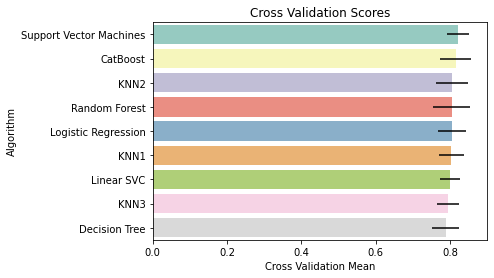

In [131]:
sns.barplot('Cross Validation Mean', 'Algorithm', data = cv_res, order = cv_res.sort_values(by = 'Cross Validation Mean', ascending = False)['Algorithm'], palette = 'Set3', **{'xerr': crossval_std})
plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')

Since SVM has highest Cross Validation Score, we proceed with that Model

## Hyperparameter tuning for SVM

In [132]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, Y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ................C=1000, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [133]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best estimator:  SVC(C=100, gamma=0.01)


In [134]:
# Training for increasing accuracy in SVM after HyperParameter tuning

svc = SVC(C = 100, gamma = 0.01, kernel = 'rbf')
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.54

In [135]:
# mean cross val score

cross_val_score(svc, X_train, Y_train, scoring = 'accuracy', cv = 10).mean()

0.8297242083758938

In [136]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [137]:
len(Y_pred)

418

In [138]:
#create final prediction df

final = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': Y_pred})
final

,PassengerId,Survived
881,892,0
882,893,0
883,894,0
884,895,0
885,896,1
...,...,...
1294,1305,0
1295,1306,1
1296,1307,0
1297,1308,0


In [139]:
final.shape

(418, 2)

In [140]:
final.to_csv('titanic_final.csv',index = False)